# Modeling Index RetGap

In [5000]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
import mplfinance as mpf
import mat4py
from tqdm import tqdm
import warnings
import baostock as bs
from multiprocessing import Pool, Manager
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [2]:
import imp

In [3]:
import xy

In [3315]:
imp.reload(xy)

<module 'xy' from 'E:\\PyProject\\xy.py'>

In [7272]:
f_names = os.listdir('factors/NewFactor')[1:]

In [7273]:
cl = pd.read_csv('index_close.csv',index_col=0).T
cl = cl.mask(cl==0,np.nan)

cl.index = ['50','300','500','1000','sz100','kc50','2000']
cl.columns = [str(int(i))[:4] + '-' + str(int(i))[4:6] + '-' + str(int(i))[6:] for i in cl.columns]
# cl = cl.loc[:,'2016-01-04':]
Index_rets = cl.pct_change(axis=1)
Index_rets = Index_rets.T.where(~np.isinf(Index_rets.T),np.nan).T.loc[:,'2016-01-04':]#['50','300','500','1000','sz100','2000'
Index_rets = Index_rets

In [7274]:
def _Standlize(Fdf):
    return (Fdf - Fdf.mean()) / Fdf.std()

In [7275]:
f_dct = {}
dts_dct = {}
for fn in f_names:    
    df0 = pd.read_csv('factors/NewFactor/'+fn,index_col=0).loc[:,'2016-01-07':]
    # 'idx_COAR_ETF_tail.csv','idx_SPS_ETF_tail.csv','st_VR.csv','st_WVAD.csv','idx_Kur_ETF.csv','st_PSY.csv','st_ENPchg.csv','st_VDEA.csv','st_TNR.csv','st_VDIFF.csv','st_VROC.csv','st_New_TSR_prepost_idx.csv','st_New_TSR_idx.csv','st_ad1.csv','st_ad.csv','st_index_VMACD_mean.csv','st_VMACD.csv','st_index_VMACD_mean1.csv','st_index_VROC_mean.csv'
    if fn in ['idx_CP.csv','st_ad2.csv','st_index_VDEA_mean1.csv','st_index_VDEA_mean.csv','st_VDEA.csv','st_ENPchg.csv','idx_COAR_ETF_tail.csv','st_VMACD.csv','st_WVAD.csv','idx_SPS_ETF_tail.csv','st_VR.csv','st_PSY.csv','st_TNR.csv','st_VDIFF.csv','st_VROC.csv','st_New_TSR_prepost_idx.csv','st_New_TSR_idx.csv','st_ad1.csv','st_ad.csv','st_index_VMACD_mean.csv','st_index_VMACD_mean1.csv','st_index_VROC_mean.csv','idx_Kur_ETF.csv','Kur_idxETF1.csv']:#,'idx_COAR_ETF_tail.csv','idx_Kur_ETF.csv','idx_SPS_ETF_tail.csv','st_VMACD.csv','st_VR.csv','st_VROC.csv','st_WVAD.csv','st_VDEA.csv'
        continue
        # kur、enpchg、vmacd、VDEA、WVAD
    print(fn)
    # display(_Standlize(df0).index)
    df0.index = df0.index.map(lambda x: str(x))
    try:
        
        f_dct[fn[:-4]] = _Standlize(df0.mask(df0==0,np.nan)).loc[['50','300','500','1000'],'2016-01-06':]
    except KeyError:
        v = _Standlize(df0).loc[['50','300','500','1000'],'2016-01-06':]
        v.index = v.index.map(lambda x: str(x))
        f_dct[fn[:-4]] = v
    dts_dct[fn[:-4]] = set(df0.columns)
    # a,b = xy.single_Factor_backtest(f_dct[fn[:-4]].shift(0,axis=1), xy.Index_rets.loc[['50','1000'],'2016-01-07':], 1, 0.00, 'x')
    plt.show()

idx_CP1.csv
idx_noon_mom.csv
idx_SR.csv
idx_STV.csv
Intra_AmpMom.csv
st_index_VDIFF_mean.csv
st_New_TSR_prepost_idx1.csv


## RSRS

In [8]:
def cal(x):
    y = np.log(x)
    x = np.arange(x.size)
    slope, intercept = np.polyfit(x, y, 1)

    # annualized_returns = math.pow(math.exp(slope), 250) - 1
    r_squared = 1 - (sum((y - (slope * x + intercept))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
    score = slope * r_squared
    
    return score

In [9]:
import math

In [10]:
sss13 = xy.cl.loc[['50','1000','300','500'],:].T.rolling(13).apply(cal).dropna().T#xy.cl.loc[['50','1000','300','500'],:].T
sss14 = xy.cl.loc[['50','1000','300','500'],:].T.rolling(14).apply(cal).dropna().T#xy.cl.loc[['50','1000','300','500'],:].T
sss15 = xy.cl.loc[['50','1000','300','500'],:].T.rolling(15).apply(cal).dropna().T#xy.cl.loc[['50','1000','300','500'],:].T
sss16 = xy.cl.loc[['50','1000','300','500'],:].T.rolling(16).apply(cal).dropna().T#xy.cl.loc[['50','1000','300','500'],:].T
sss17 = xy.cl.loc[['50','1000','300','500'],:].T.rolling(17).apply(cal).dropna().T#xy.cl.loc[['50','1000','300','500'],:].T

In [11]:
sss = (sss13 + sss14 + sss15 + sss16 + sss17)/4

0.04911492229106819
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

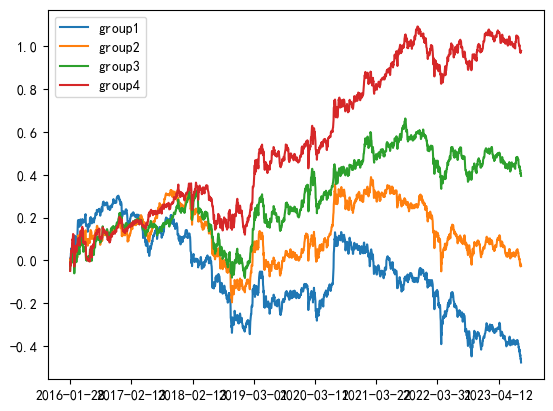

In [12]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    sss.shift(1,axis=1).loc[['50', '300', '500', '1000'],'2016-01-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

410.0 0.41000000000000003
yoy: 0.17317454624056772 
 mdd: -0.2809304841221967 
 sharpe: 0.8729536526487187 
 rankIC: 0.050537634408602136 
 rankIR: 0.050588691586101235 
 win%: 0.5129032258064516 
 gain_loss%: -1.0997546441490225


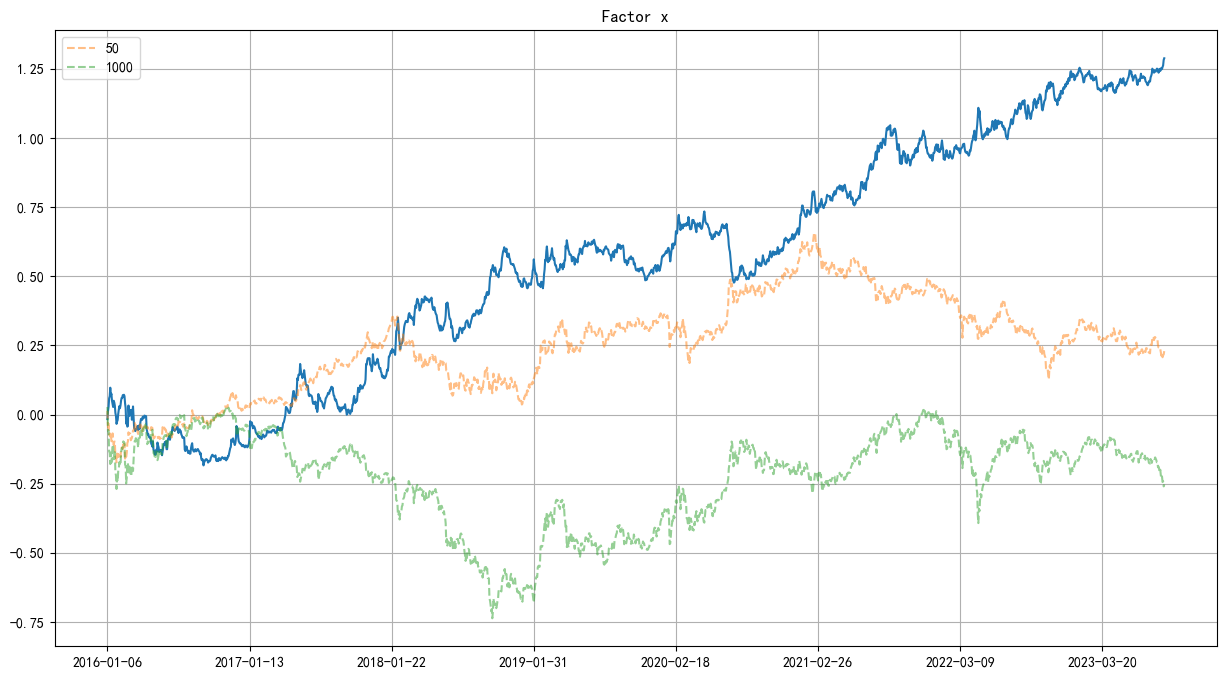

In [3569]:
added_X = _Standlize(sss.shift(1,axis=1)).loc[['50','300','500','1000'],'2016-01-06':]
ssa,ssb = xy.single_Factor_backtest(added_X.loc[['50','1000'],'2016-01-06':], xy.Index_rets.loc[['50','1000'],'2016-01-06':], 1, 0.001, 'x')

## CORR

In [14]:
pd.read_csv('index_money.csv',index_col=0).T

2016-01-04    2016-01-05    2016-01-06    2016-01-07    2016-01-08  \
50    3.775372e+10  5.104514e+10  3.989499e+10  1.147481e+10  5.379758e+10   
300   1.460000e+11  1.960000e+11  1.610000e+11  4.713080e+10  2.030000e+11   
500   1.150000e+11  1.570000e+11  1.360000e+11  3.478154e+10  1.390000e+11   
1000  1.970000e+11  2.660000e+11  2.270000e+11  5.753662e+10  2.310000e+11   

        2016-01-11    2016-01-12    2016-01-13    2016-01-14    2016-01-15  \
50    4.888816e+10  3.619537e+10  3.298628e+10  3.541565e+10  3.360367e+10   
300   1.840000e+11  1.420000e+11  1.310000e+11  1.450000e+11  1.320000e+11   
500   1.330000e+11  1.060000e+11  9.845670e+10  1.040000e+11  1.020000e+11   
1000  1.950000e+11  1.700000e+11  1.580000e+11  1.670000e+11  1.710000e+11   

      ...    2023-08-15    2023-08-16    2023-08-17    2023-08-18  \
50    ...  4.606512e+10  4.475695e+10  4.419536e+10  4.409917e+10   
300   ...  1.770000e+11  1.690000e+11  1.740000e+11  1.680000e+11   
500   ...  1.080000e+11  1.140000e+11  1.210000e+11  1.100000e+11   
1000  ...  1.330000e+11  1.320000e+11  1.390000e+11  1.400000e+11   

        2023-08-21    2023-08-22    2023-08-23    2023-08-24    2023-08-25  \
50    4.750888e+10  5.847781e+10  4.337927e+10  5.189268e+10  4.530030e+10   
300   1.730000e+11  2.030000e+11  1.600000e+11  1.960000e+11  1.760000e+11   
500   9.669199e+10  1.200000e+11  1.020000e+11  1.210000e+11  1.150000e+11   
1000  1.200000e+11  1.540000e+11  1.360000e+11  1.470000e+11  1.510000e+11   

        2023-08-28  
50    9.440603e+10  
300   3.350000e+11  
500   1.810000e+11  
1000  2.130000e+11  

[4 rows x 1862 columns]

In [15]:
def cal_corr_vwap(n):
    vwap_index = (xy.Index_rets.loc[['50','300','500','1000']] * ((pd.read_csv('index_money.csv',index_col=0).T)/(pd.read_csv('index_money.csv',index_col=0).rolling(n).sum()).T))

    cors_dct = []
    for vw, money in zip(xy.rolling_window(vwap_index.T.dropna().T,n), xy.rolling_window((pd.read_csv('index_money.csv',index_col=0)).T.iloc[:,n-1:],n)):
        cors = []
        for i, j in zip(vw,money):
            cors.append(np.corrcoef(i,j)[0,1])
        cors_dct.append(pd.Series(cors))

    CORR = pd.DataFrame(cors_dct, index=vwap_index.index)
    CORR.columns = vwap_index.T.dropna().T.columns[n-1:]
    CORR = CORR.shift(1,axis=1)
    
    return CORR

In [16]:
CORR8 = cal_corr_vwap(8)
CORR9 = cal_corr_vwap(9)
CORR10 = cal_corr_vwap(10)
CORR11 = cal_corr_vwap(11)
CORR12 = cal_corr_vwap(12)

CORR = (CORR8 + CORR9 + CORR10 + CORR11 + CORR12)/5

0.018659973517511128
1 0.9972885032537961
2 0.9972885032537961
3 0.9972885032537961
4 0.9972885032537961


<Axes: >

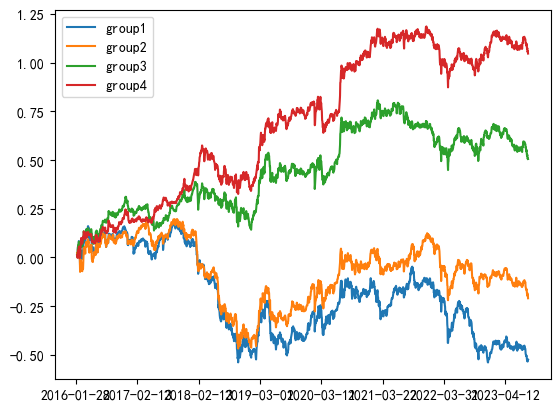

In [17]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    CORR.loc[['50', '300', '500', '1000'],'2016-01-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

754.0
yoy: 0.2623745168965826 
 mdd: -0.24660667239441736 
 sharpe: 1.3442247097017308 
 rankIC: 0.013594344752582924 
 rankIR: 0.013591904117967025 
 win%: 0.5043290043290043 
 gain_loss%: -1.2217390088148297


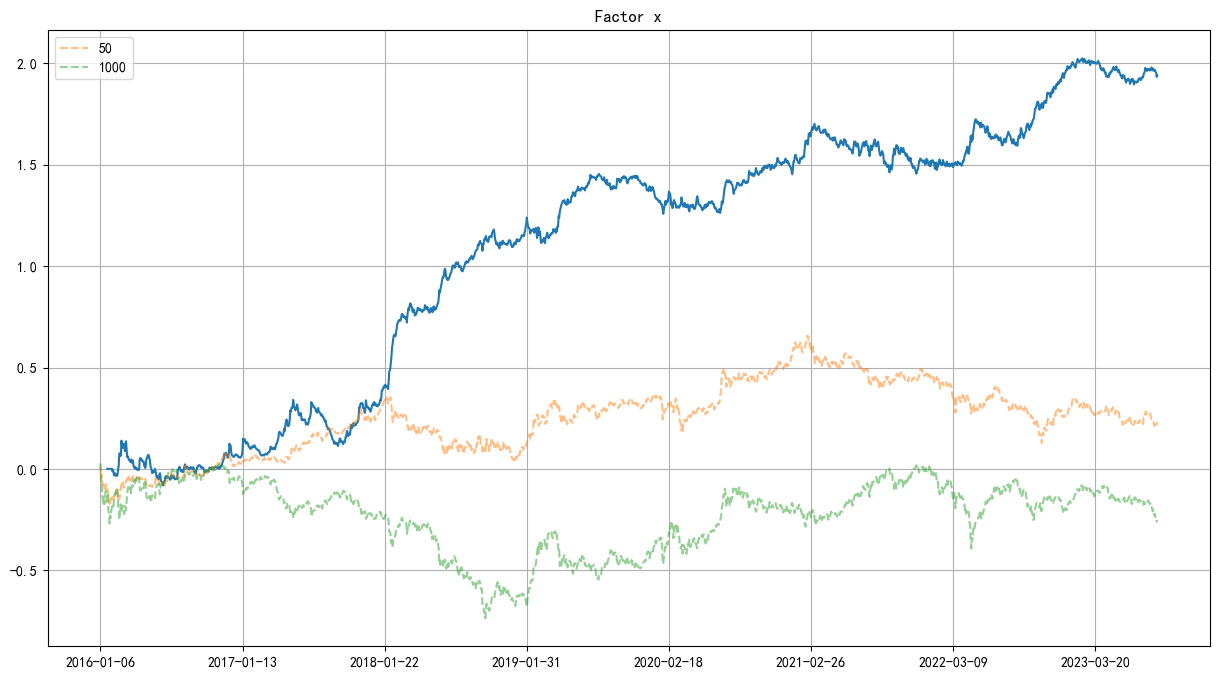

In [641]:
added_X1 = _Standlize(CORR).loc[['50','300','500','1000'],'2016-01-06':]
ssa1,ssb1 = xy.single_Factor_backtest(added_X1.loc[['50','1000'],'2016-01-06':], xy.Index_rets.loc[['50','1000'],'2016-01-06':], 1, 0.00, 'x')

## LS 

In [19]:
r_v = (xy.Index_rets.T * pd.read_csv('index_tov.csv',index_col=0)).dropna(how='all')

In [6786]:
LS18 = r_v.rolling(18).apply(lambda x: (x[x>0].mean()/x[x>0].std()) - ((x[x<0].abs().mean()/(x[x<0].abs().std())))).T.loc[['50','300','500','1000'],'2016-01-06':]
LS19 = r_v.rolling(19).apply(lambda x: (x[x>0].mean()/x[x>0].std()) - ((x[x<0].abs().mean()/(x[x<0].abs().std())))).T.loc[['50','300','500','1000'],'2016-01-06':]
LS20 = r_v.rolling(20).apply(lambda x: (x[x>0].mean()/x[x>0].std()) - ((x[x<0].abs().mean()/(x[x<0].abs().std())))).T.loc[['50','300','500','1000'],'2016-01-06':]
LS21 = r_v.rolling(21).apply(lambda x: (x[x>0].mean()/x[x>0].std()) - ((x[x<0].abs().mean()/(x[x<0].abs().std())))).T.loc[['50','300','500','1000'],'2016-01-06':]
LS22 = r_v.rolling(22).apply(lambda x: (x[x>0].mean()/x[x>0].std()) - ((x[x<0].abs().mean()/(x[x<0].abs().std())))).T.loc[['50','300','500','1000'],'2016-01-06':]

In [6787]:
LS = (LS18 + LS19 +LS20 +LS21 +LS22) /4

0.06531263984687423
1 0.9945474372955289
2 0.9978189749182116
3 0.9978189749182116
4 0.9978189749182116


<Axes: >

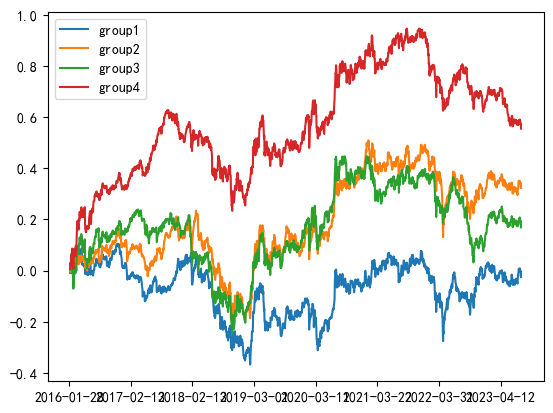

In [6788]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    LS.loc[['50', '300', '500', '1000'],'2016-01-28':].shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

616.0 0.0
yoy: 0.06735211240211443 
 mdd: -0.37643074341427296 
 sharpe: 0.34444399038804346 
 rankIC: 0.043859649122807015 
 rankIR: 0.043889859642986764 
 win%: 0.5162162162162162 
 gain_loss%: -0.9713816143095


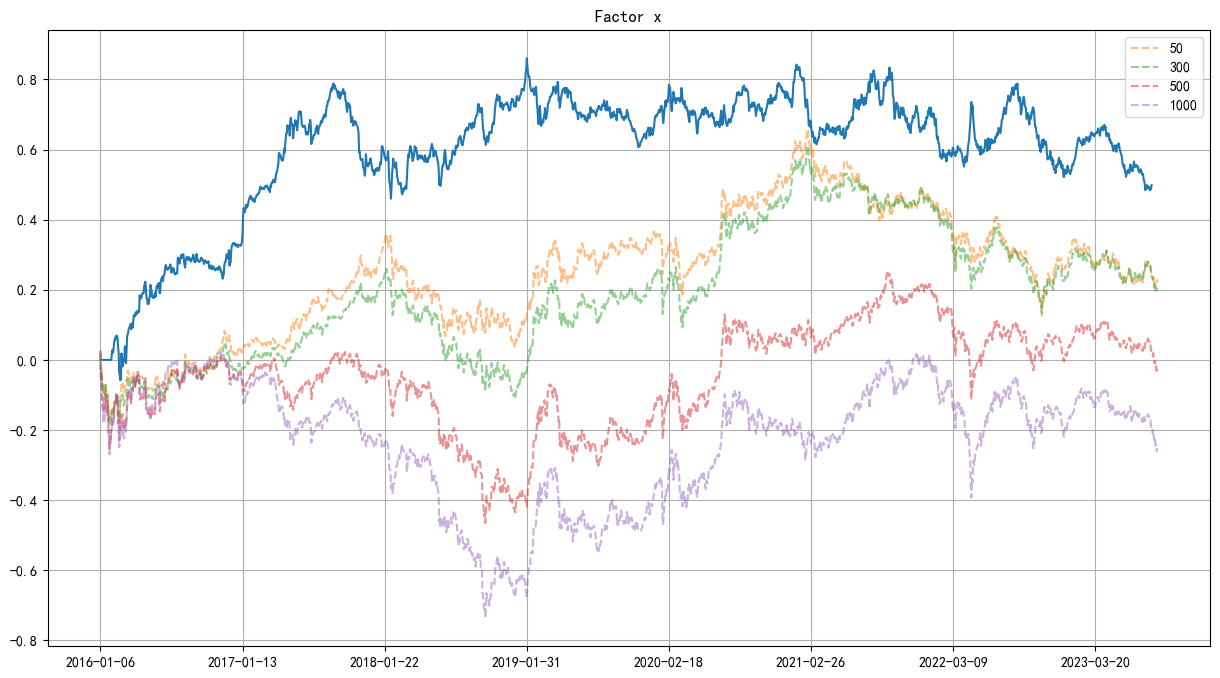

In [6789]:
added_X2 = _Standlize(LS.shift(1,axis=1)).loc[['50','300','500','1000'],'2016-01-06':]
ssa2,ssb2 = xy.single_Factor_backtest(added_X2.loc[['50', '1000'],'2016-01-06':], xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-06':], 1, 0.00, 'x')

0.02310370112459425

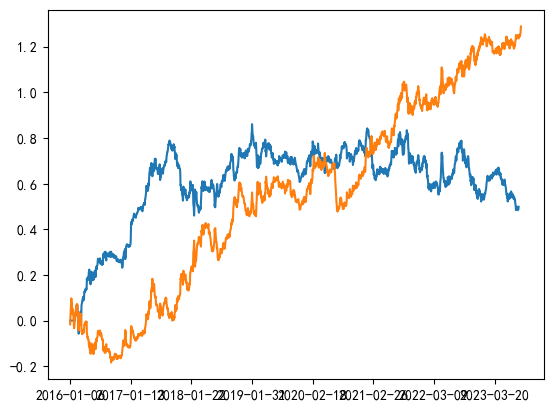

In [6790]:
ssb2.cumsum().plot()
ssb.cumsum().plot()
ssb2.corr(ssb3)

## VWAP_Mom

In [25]:
VM18 = r_v.rolling(12-1).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]
VM19 = r_v.rolling(13-1).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]
VM20 = r_v.rolling(14-1).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]
VM21 = r_v.rolling(15-1).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]
VM22 = r_v.rolling(16-1).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]

In [26]:
VM = (VM18 + VM19 +VM20 +VM21 +VM22) /4

0.08006434678401476
1 0.9994547437295529
2 0.9994547437295529
3 0.9994547437295529
4 0.9994547437295529


<Axes: >

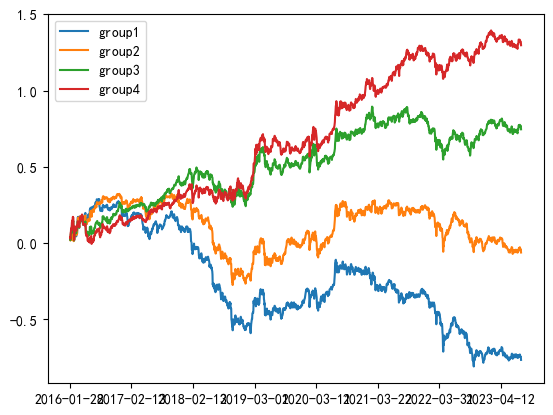

In [7696]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    VM.loc[['50', '300', '500', '1000'],'2016-01-28':].shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

610.0
yoy: 0.2677532936663535 
 mdd: -0.3376368765936625 
 sharpe: 1.3687898548074149 
 rankIC: 0.05606967882416984 
 rankIR: 0.056142736024966146 
 win%: 0.5243243243243243 
 gain_loss%: -1.1268860845806905


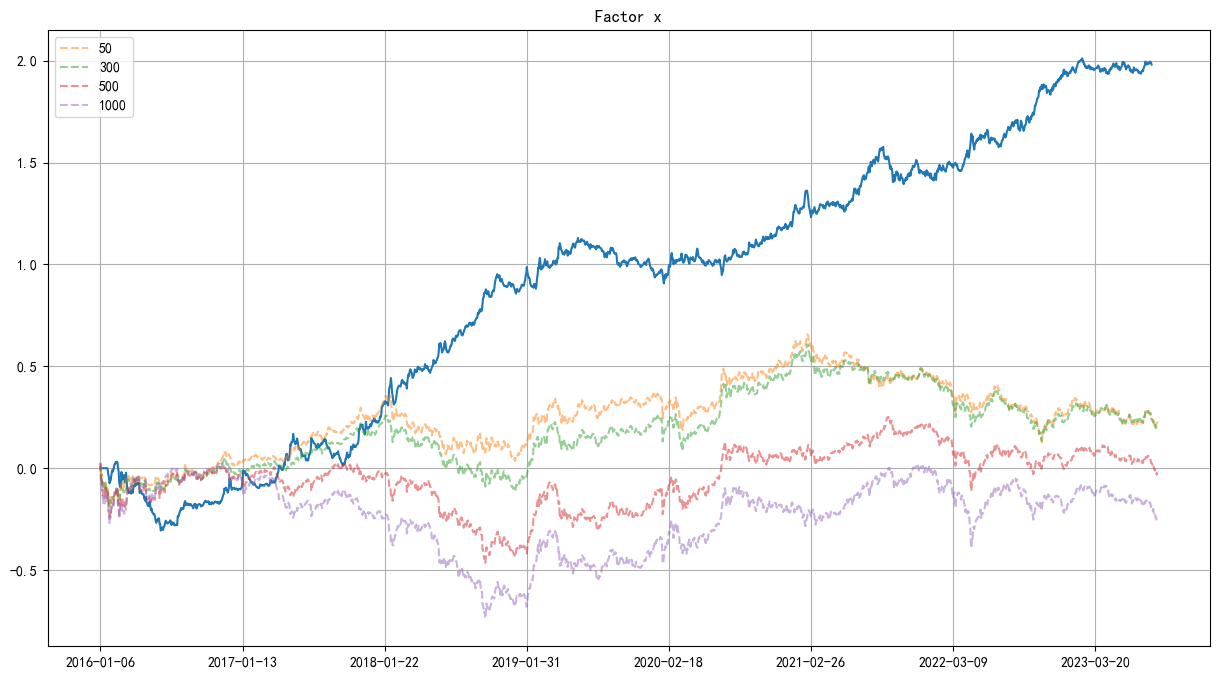

In [643]:
added_X3 = (_Standlize(VM.shift(1,axis=1))+0).loc[['50','300','500','1000'],'2016-01-06':]
ssa3,ssb3 = xy.single_Factor_backtest(added_X3.loc[['50', '1000'],'2016-01-06':], xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-06':], 1, 0.00, 'x')

In [ ]:
ssb3.cumsum().plot()
ssb.cumsum().plot()
ssb3.corr(ssb1)

## Vol_Mom

In [29]:
V18 = pd.read_csv('index_money.csv',index_col=0).rolling(18-6).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]
V19 = pd.read_csv('index_money.csv',index_col=0).rolling(19-6).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]
V20 = pd.read_csv('index_money.csv',index_col=0).rolling(20-6).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]
V21 = pd.read_csv('index_money.csv',index_col=0).rolling(21-6).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]
V22 = pd.read_csv('index_money.csv',index_col=0).rolling(22-6).apply(lambda x: (x.mean()/x.std())).T.loc[['50','300','500','1000'],'2016-01-06':]

In [30]:
VD = (V18 + V19 +V20 +V21 +V22) /4

0.0003039167146593651
1 0.9994577006507592
2 0.9994577006507592
3 0.9994577006507592
4 0.9994577006507592


<Axes: >

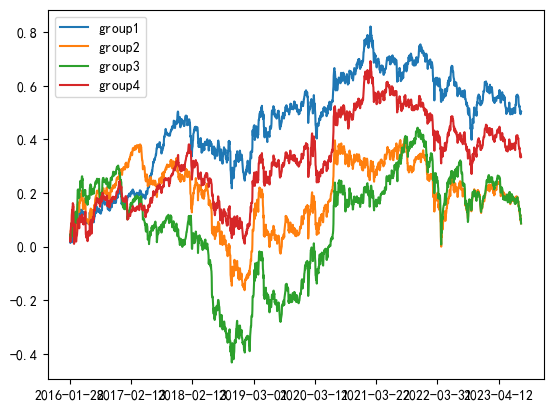

In [31]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    VD.loc[['50', '300', '500', '1000'],'2016-01-28':].shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

704.0 0.0
yoy: 0.008971117422471 
 mdd: -0.5381452886322254 
 sharpe: 0.05111138193572333 
 rankIC: 0.04247020585048754 
 rankIR: 0.05491642025962725 
 win%: 0.5231182795698924 
 gain_loss%: -0.905210884342432


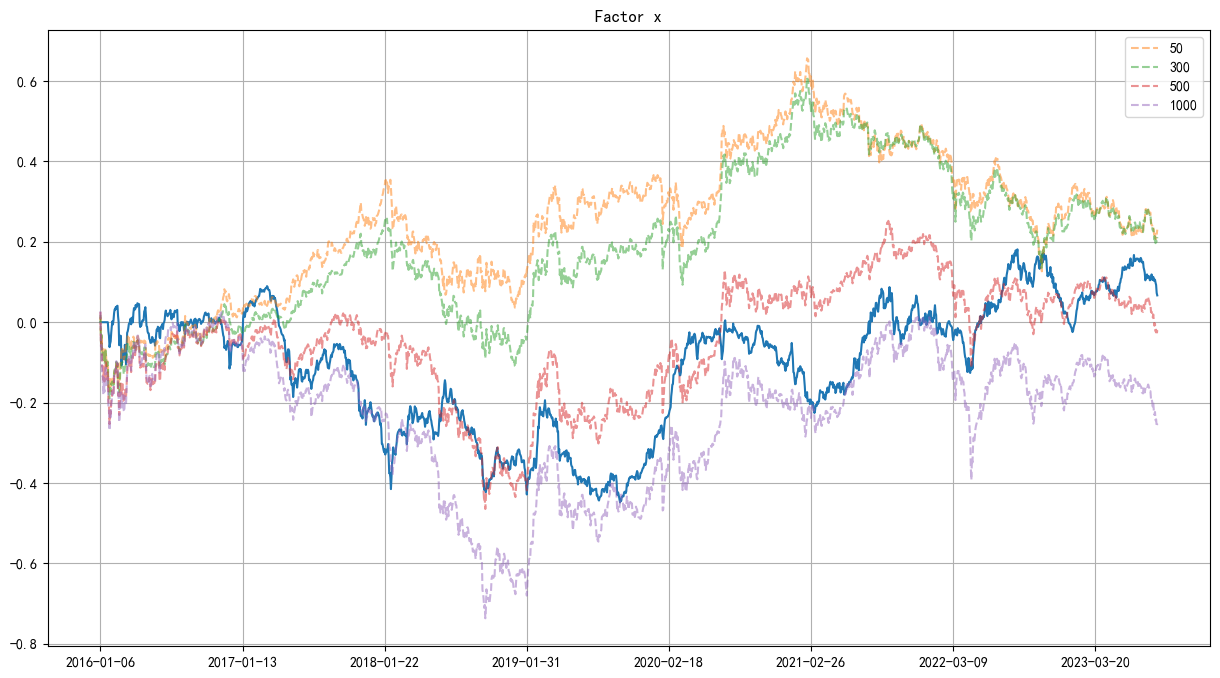

In [5361]:
added_X4= (_Standlize(VD.shift(1,axis=1))+0).loc[['50', '300', '500','1000'],'2016-01-06':]
ssa4,ssb4 = xy.single_Factor_backtest(added_X4.loc[['50', '300', '500', '1000'],'2016-01-06':], xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-06':], 1, 0.00, 'x')

In [ ]:
ssb4.cumsum().plot()
ssb.cumsum().plot()
ssb4.corr(ssb4)

## Vol_drop_std

In [6798]:
VDS18 = xy.Index_rets.T.rolling(18-6).apply(lambda x: (x[x<0].std())).T.loc[['50','300','500','1000'],'2016-01-06':]
VDS19 = xy.Index_rets.T.rolling(19-6).apply(lambda x: (x[x<0].std())).T.loc[['50','300','500','1000'],'2016-01-06':]
VDS20 = xy.Index_rets.T.rolling(20-6).apply(lambda x: (x[x<0].std())).T.loc[['50','300','500','1000'],'2016-01-06':]
VDS21 = xy.Index_rets.T.rolling(21-6).apply(lambda x: (x[x<0].std())).T.loc[['50','300','500','1000'],'2016-01-06':]
VDS22 = xy.Index_rets.T.rolling(22-6).apply(lambda x: (x[x<0].std())).T.loc[['50','300','500','1000'],'2016-01-06':]

In [6799]:
VDS = (VDS18 + VDS19 +VDS20 +VDS21 +VDS22) /4

0.039526964325997165
1 0.982646420824295
2 0.9994577006507592
3 0.995119305856833
4 0.9994577006507592


<Axes: >

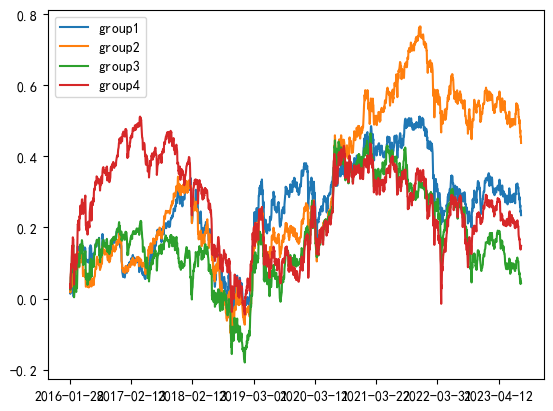

In [6800]:
# 分组收益率
gr_ad = xy.cal_rate_group(
    VDS.loc[['50', '300', '500', '1000'],'2016-01-28':].shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_ad.cumsum().plot()

410.0 0.0
yoy: 0.00929384593406296 
 mdd: -0.6106622735053503 
 sharpe: 0.047531398285993204 
 rankIC: 0.06813186813186813 
 rankIR: 0.06827178949583682 
 win%: 0.5306451612903226 
 gain_loss%: -0.8773506387069809


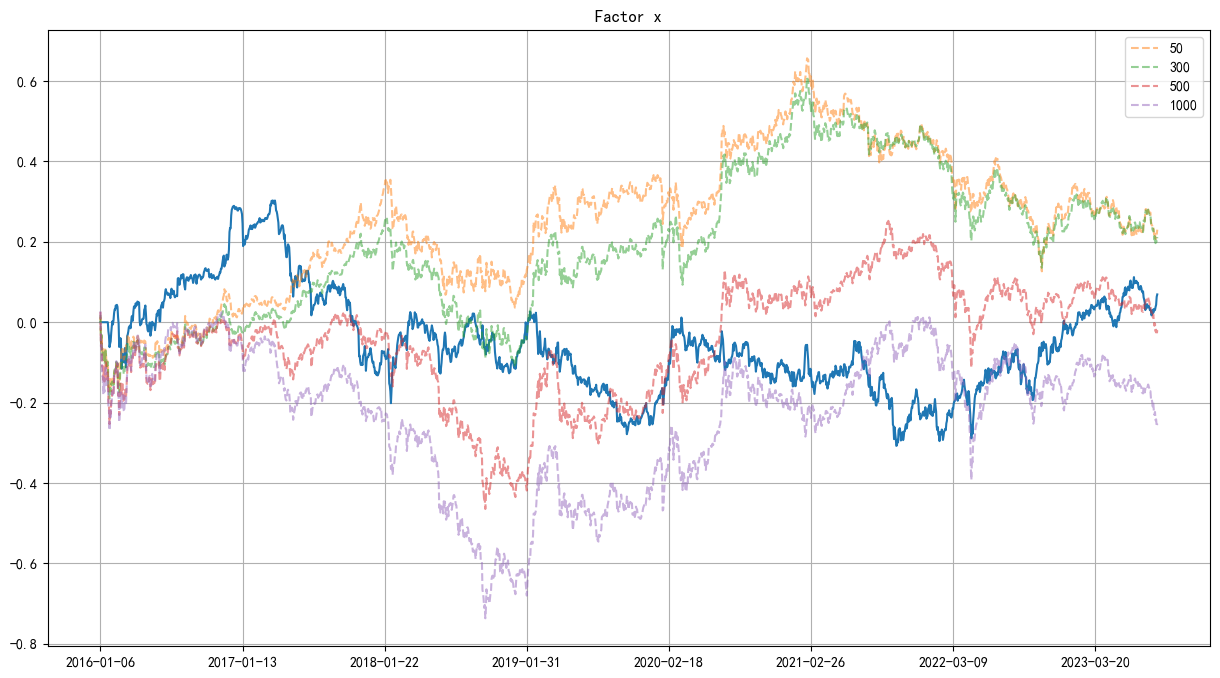

In [6850]:
added_X5= (_Standlize(VDS.shift(1,axis=1))+0).loc[['50','300', '500','1000'],'2016-01-06':]
ssa5,ssb5 = xy.single_Factor_backtest(added_X5.loc[['50', '1000'],'2016-01-06':], xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-06':], 1, 0.00, 'x')

In [ ]:
ssb5.cumsum().plot()
ssb.cumsum().plot()
ssb5.corr(ssb)

## TURN20

In [7572]:
st_TURN20 = xy.rets.T.rolling(40).apply(lambda x: x[:20].mean() - x[20:].mean()).T

KeyboardInterrupt: 

In [ ]:
# 分组收益率
gr_stTURN = xy.cal_rate_group(
    st_TURN20.shift(1,axis=1),
    xy.rets.loc[:,'2016-01-28':],
    group_num=10,
    masks=1
)
gr_stTURN.cumsum().plot()

In [7673]:
n = 60
TURN120 = r_v.rolling(n*2).apply(lambda x: x[:n].mean()).T

In [7674]:
m = 30
TURN60 = r_v.rolling(m*2).apply(lambda x: x[:m].mean()).T

0.01688546300872238
1 0.9443838604143948
2 0.9443838604143948
3 0.9443838604143948
4 0.9443838604143948


<Axes: >

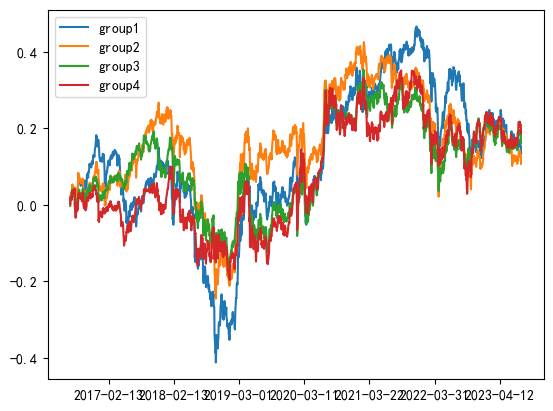

In [7675]:
# 分组收益率
gr_TURN = xy.cal_rate_group(
    (TURN120 + TURN60).loc[['50', '300', '500', '1000'],'2016-01-28':].shift(1,axis=1),
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_TURN.cumsum().plot()

446.0 0.0
yoy: -0.1712980000582019 
 mdd: -1.542468421080673 
 sharpe: -0.9231808579339368 
 rankIC: -0.003464203233256351 
 rankIR: -0.0034632238108186354 
 win%: 0.47055616139585604 
 gain_loss%: -0.8593763201643546


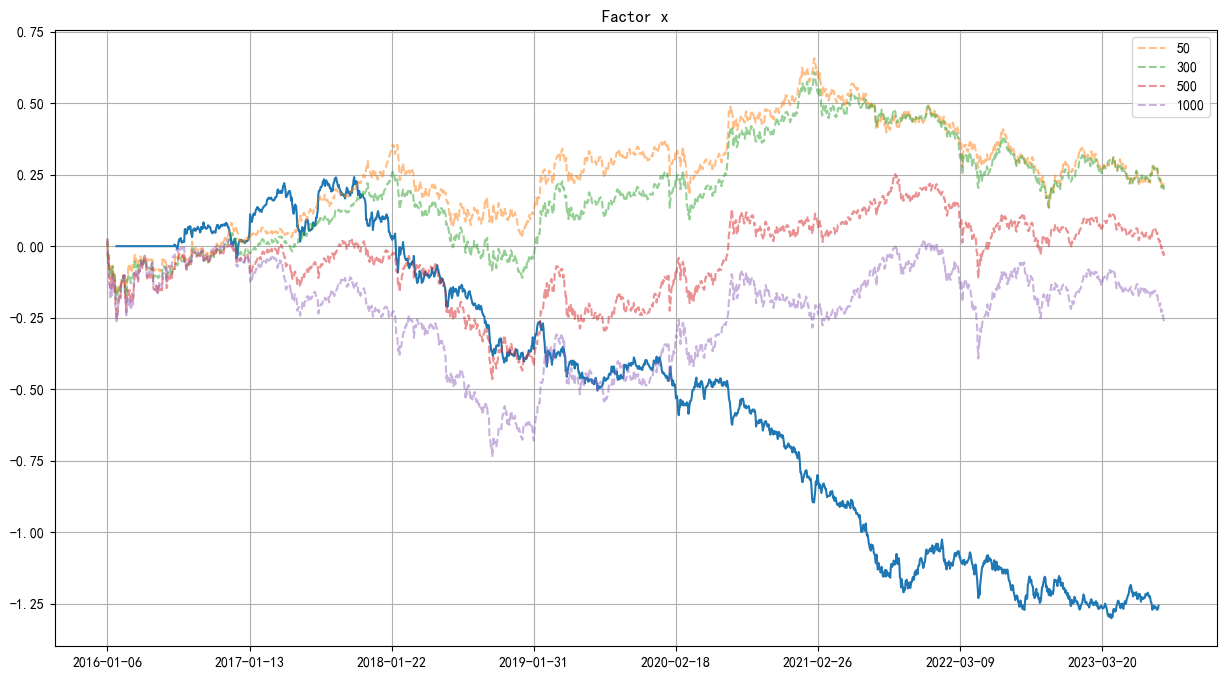

In [7617]:
added_X6= (_Standlize((TURN120 + TURN60).loc[['50', '300', '500', '1000'],'2016-01-28':].shift(1,axis=1))+0).loc[['50','300', '500','1000'],'2016-01-06':]
ssa6,ssb6 = xy.single_Factor_backtest(added_X6.loc[['50', '1000'],'2016-01-06':], xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-06':], 1, 0.00, 'x')

In [ ]:
ssb5.cumsum().plot()
ssb.cumsum().plot()
ssb5.corr(ssb)

## combine

1062.0 0.0
yoy: 0.1594434090494564 
 mdd: -0.3761821666668367 
 sharpe: 0.8129367939911724 
 rankIC: -0.04595185995623632 
 rankIR: -0.04598786838601781 
 win%: 0.5187194791101465 
 gain_loss%: -1.0467256792996047


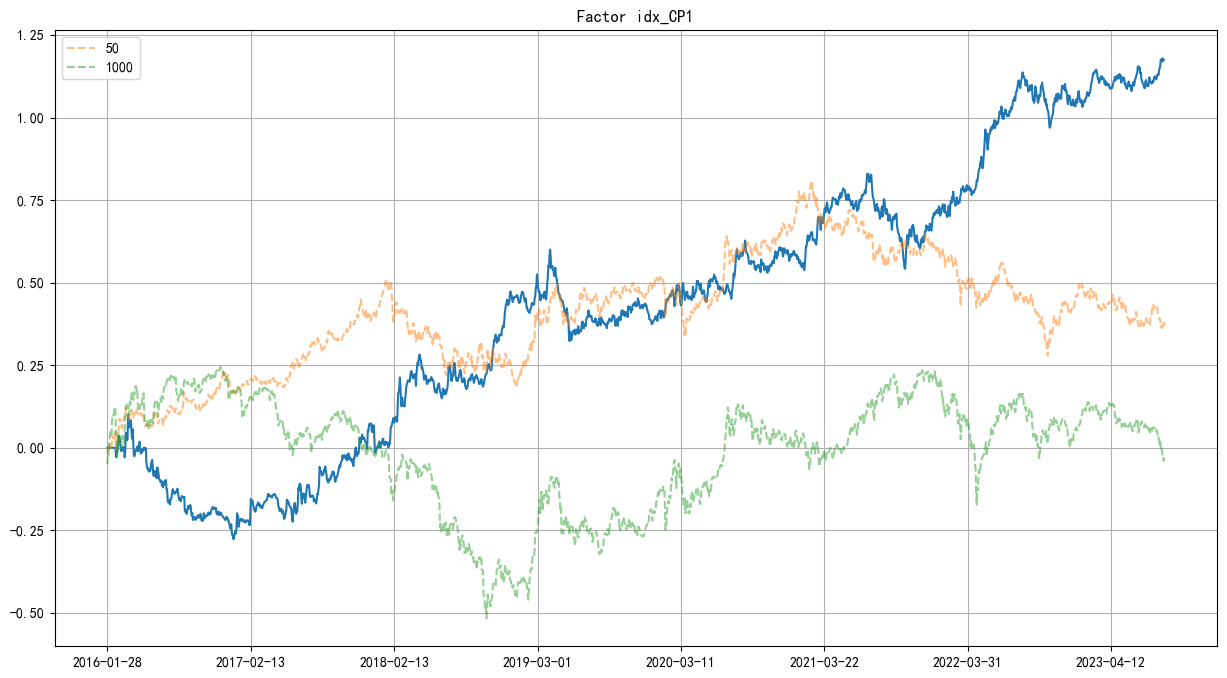

In [6860]:
a0,b0 = xy.single_Factor_backtest(
    f_dct[list(f_dct.keys())[0]].loc[['50','1000'],:], 
    xy.Index_rets.loc[['50','1000'],'2016-01-28':],
    _side=-1,
    fee=0.00,
    name=list(f_dct.keys())[0])

3674.0 0.0
yoy: 0.26827898490044794 
 mdd: -0.23472813561041472 
 sharpe: 1.3711693525731783 
 rankIC: 0.08424507658643322 
 rankIR: 0.08452250249338975 
 win%: 0.5377102550189907 
 gain_loss%: -1.0654188225709185


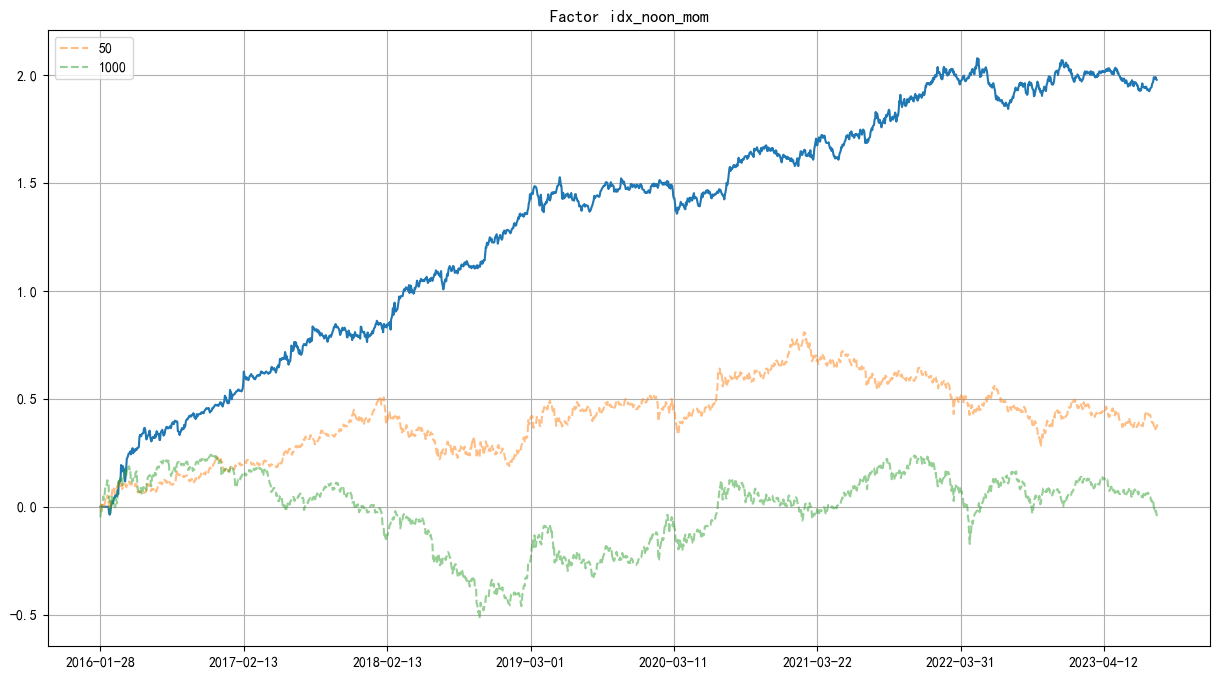

In [6861]:
a1,b1 = xy.single_Factor_backtest(
    f_dct[list(f_dct.keys())[1]].loc[['50','1000'],:], 
    xy.Index_rets.loc[['50','1000'],'2016-01-28':],
    _side=1,
    fee=0.00,
    name=list(f_dct.keys())[1])

2114.0 0.0
yoy: 0.06263711085231734 
 mdd: -0.21161328525730327 
 sharpe: 0.4600364261660792 
 rankIC: -0.12328767123287668 
 rankIR: -0.12409356448425611 
 win%: 0.23819858925664678 
 gain_loss%: -0.9444244649053228


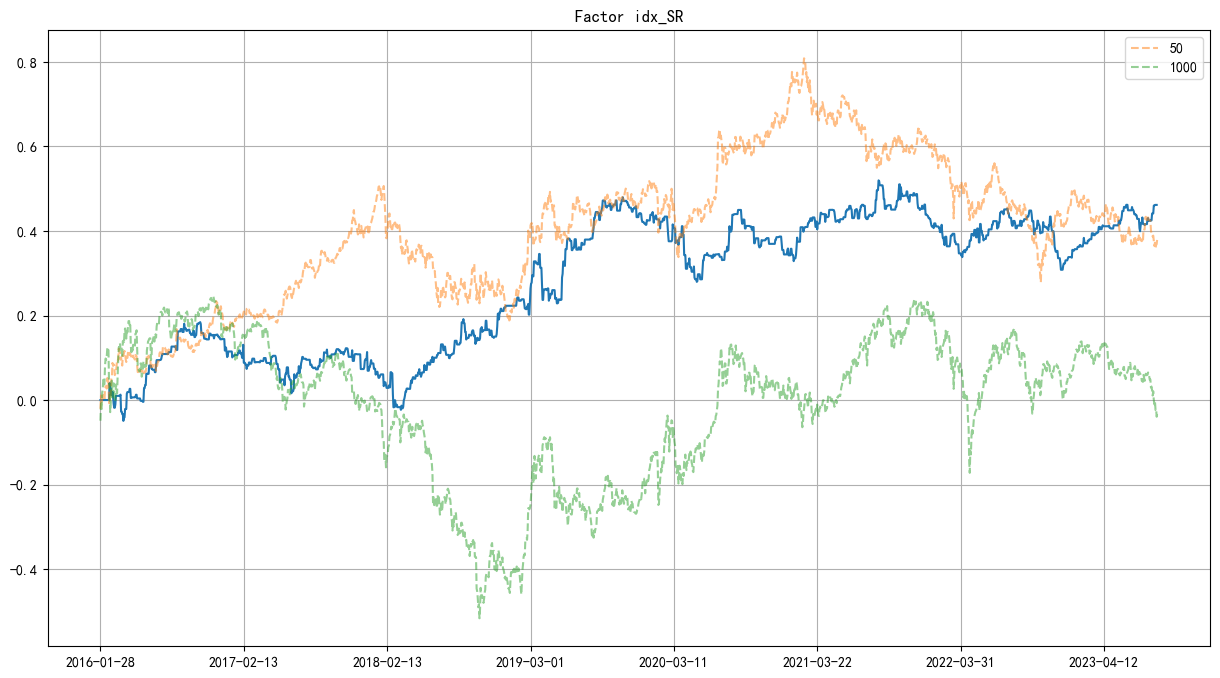

In [6862]:
a2,b2 = xy.single_Factor_backtest(
    f_dct[list(f_dct.keys())[2]].loc[['50','1000'],:], 
    xy.Index_rets.loc[['50','1000'],'2016-01-28':],
    _side=-1,
    fee=0.00,
    name=list(f_dct.keys())[2])

1458.0 0.0
yoy: 0.35413274080590895 
 mdd: -0.2473401992159303 
 sharpe: 1.8199078292645772 
 rankIC: 0.09544468546637741 
 rankIR: 0.09585641206650318 
 win%: 0.5433028509951587 
 gain_loss%: -1.12415743799734


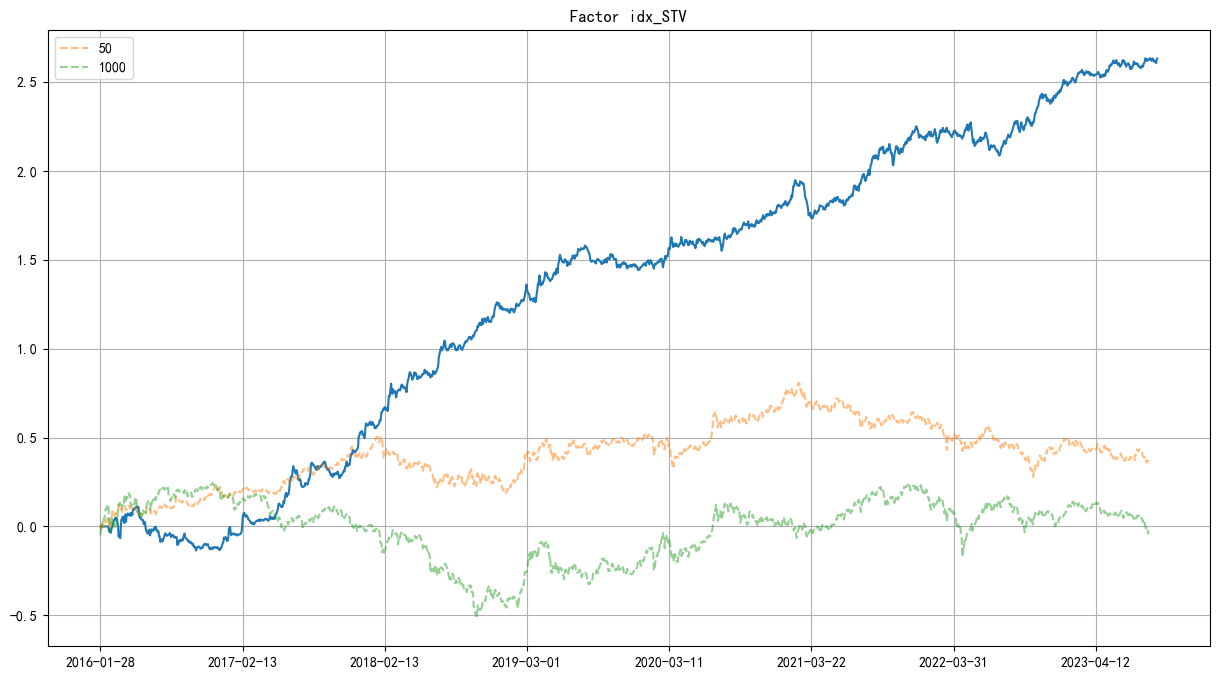

In [6863]:
a3,b3 = xy.single_Factor_backtest(
    f_dct[list(f_dct.keys())[3]].loc[['50','1000'],:], 
    xy.Index_rets.loc[['50','1000'],'2016-01-28':],
    _side=1,
    fee=0.00,
    name=list(f_dct.keys())[3])

1962.0 0.0
yoy: 0.26302751004862235 
 mdd: -0.18626790087880662 
 sharpe: 1.333387734386086 
 rankIC: 0.05822498586772186 
 rankIR: 0.05830744588052842 
 win%: 0.5246636771300448 
 gain_loss%: -1.1157527367872146


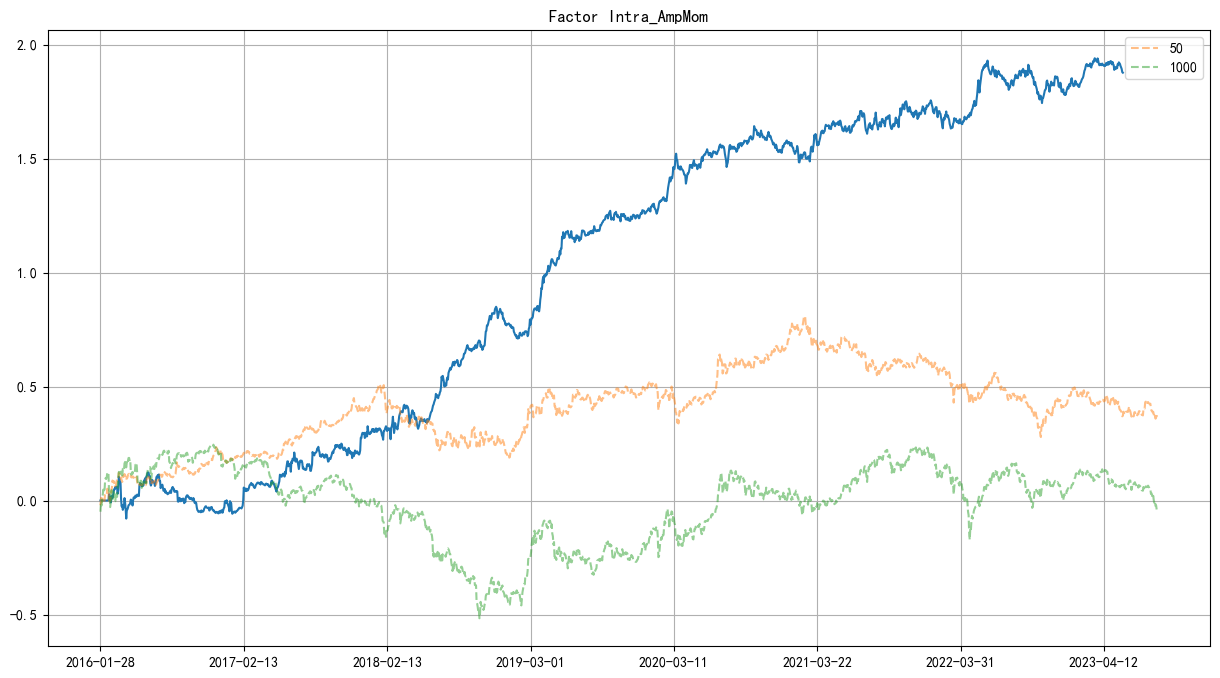

In [7277]:
a4,b4 = xy.single_Factor_backtest(
    f_dct[list(f_dct.keys())[4]].loc[['50','1000'],:], 
    xy.Index_rets.loc[['50','1000'],'2016-01-28':],
    _side=1,
    fee=0.00,
    name=list(f_dct.keys())[4])

1134.0 0.0
yoy: 0.17996330983602848 
 mdd: -0.472140590572129 
 sharpe: 0.9201355368321944 
 rankIC: 0.03418339663591969 
 rankIR: 0.034194105355820195 
 win%: 0.5129171151776103 
 gain_loss%: -1.0913719608613686


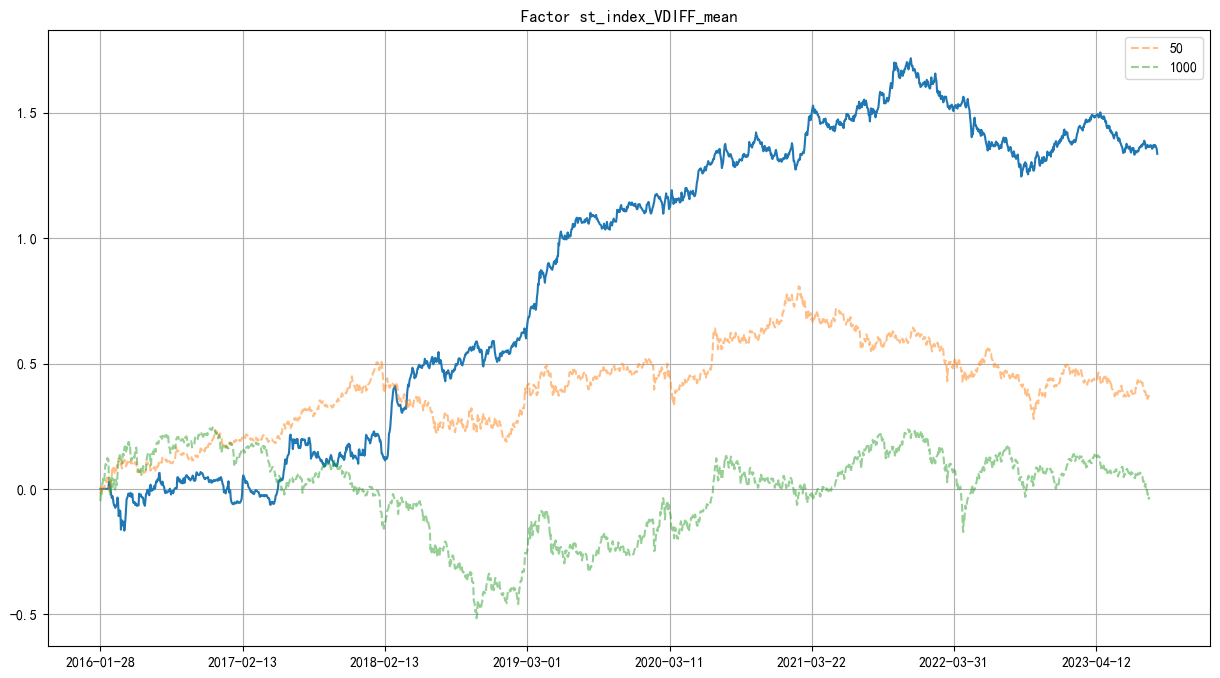

In [6865]:
a5,b5 = xy.single_Factor_backtest(
    f_dct[list(f_dct.keys())[5]].loc[['50','1000'],:], 
    xy.Index_rets.loc[['50','1000'],'2016-01-28':],
    _side=1,
    fee=0.00,
    name=list(f_dct.keys())[5])

586.0 0.0
yoy: 0.17398675194791463 
 mdd: -0.24380692586575392 
 sharpe: 0.8916533925294942 
 rankIC: 0.0581837955410549 
 rankIR: 0.058266684269740715 
 win%: 0.523681377825619 
 gain_loss%: -1.0353123397099182


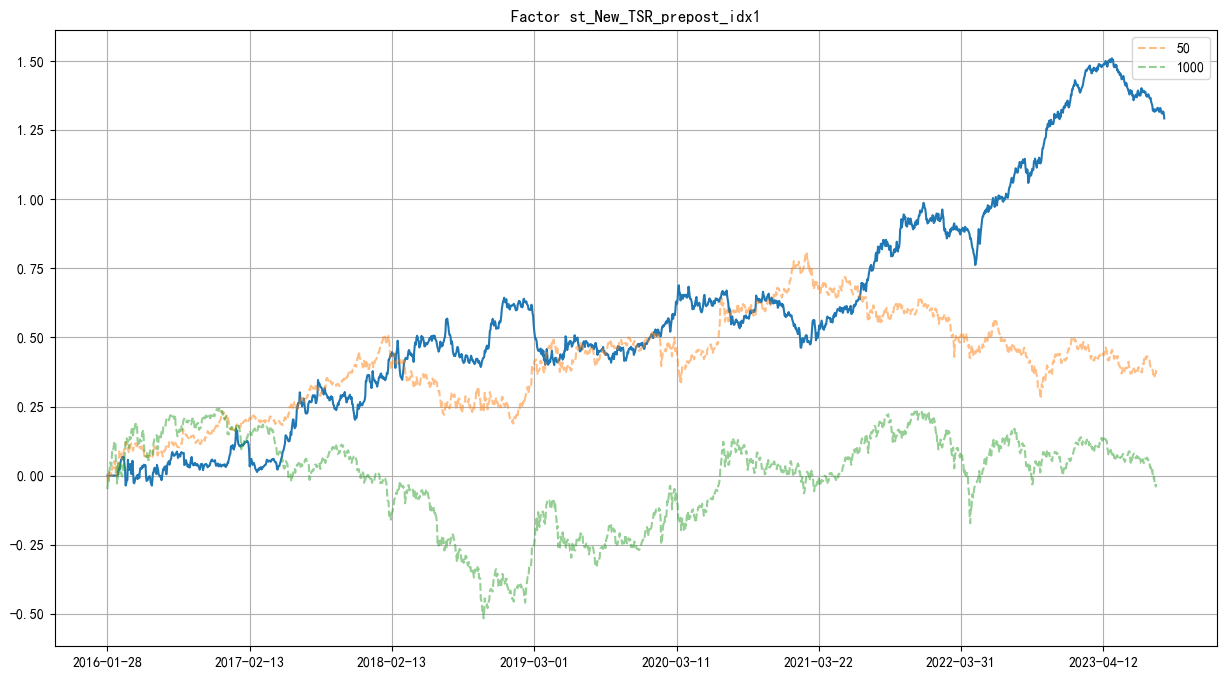

In [6868]:
a6,b6 = xy.single_Factor_backtest(
    f_dct[list(f_dct.keys())[6]].loc[['50','1000'],:], 
    xy.Index_rets.loc[['50','1000'],'2016-01-28':],
    _side=1,
    fee=0.00,
    name=list(f_dct.keys())[6])

In [7730]:
pd.concat([
    b0.rename(list(f_dct.keys())[0]),
    b1.rename(list(f_dct.keys())[1]),
    b2.rename(list(f_dct.keys())[2]),
    b3.rename(list(f_dct.keys())[3]),
    b4.rename(list(f_dct.keys())[4]),
    b5.rename(list(f_dct.keys())[5]),
    b6.rename(list(f_dct.keys())[6]),
    ssb.rename('RSRS'),
    ssb1.rename('CORR'),
    ssb2.rename('LS'),
    ssb3.rename('VWAP_Mom'),
    ssb4.rename('Vol_Mom'),
    ssb5.rename('VD'),
    ssb6.rename('Turn'),
],axis=1).dropna().corr().abs().sum().sort_values()

st_index_VDIFF_mean        1.653961
idx_SR                     1.681816
LS                         2.102519
idx_noon_mom               2.384185
Vol_Mom                    2.770468
Intra_AmpMom               3.063685
VD                         3.294464
CORR                       3.751891
st_New_TSR_prepost_idx1    3.846535
idx_CP1                    3.960584
Turn                       4.177365
idx_STV                    4.350791
RSRS                       5.006861
VWAP_Mom                   5.149936
dtype: float64

In [5071]:
# for _name, _df in f_dct.items():
#     display(_df)
#     DF = DF + 1*_df.fillna(0).loc[:,'2016-01-04':]
#     # break

In [7766]:
DF = pd.DataFrame(0,index=_df.index,columns=_df.columns)

In [7767]:
# CP：过度自信
f0 = 1*f_dct[list(f_dct.keys())[0]].loc[['50','300','500','1000'],:].fillna(0).loc[:,'2016-01-04':]
# f2 = f2.mask(((f2!=4)&(f2!=1)),0)
DF = DF - f0 #,'300','500'

In [7768]:
# idx_noon_mom：早晚动量
f1 = 1*f_dct[list(f_dct.keys())[1]].loc[['50','300','500','1000'],:].fillna(0).loc[:,'2016-01-04':]
# f1 = f1.mask(((f1!=4)&(f1!=1)),0)
DF = DF + f1.applymap(lambda x:x**(5)/5 if x>0 else -(-x)**(5)/5)

In [7769]:
# # SR：
# f2 = 1*f_dct[list(f_dct.keys())[2]].loc[['50','300','500','1000'],:].fillna(0).loc[:,'2016-01-04':]
# # f5 = f5.mask(((f5!=4)&(f5!=1)),0)
# DF = DF + f2

In [7770]:
# STV：日频动量换手切换
f3 = 1*f_dct[list(f_dct.keys())[3]].loc[['50','300','500','1000'],:].fillna(0).loc[:,'2016-01-04':]
# f3 = f3.mask(((f3!=4)&(f3!=1)),0)
DF = DF + f3 #,'300','500'

In [7771]:
# Intra_AmpMom：日内动量振幅加权
f4 = 1*f_dct[list(f_dct.keys())[4]].loc[['50','300','500','1000'],:].fillna(0).loc[:,'2016-01-04':]
# f3 = f3.mask(((f3!=4)&(f3!=1)),0)
DF = DF + f4.applymap(lambda x:x**(5)/5 if x>0 else -(-x)**(5)/5) #,'300','500'

In [7772]:
# Vdiff：量比
f5 = 1*f_dct[list(f_dct.keys())[5]].loc[['50','300','500','1000'],:].fillna(0).loc[:,'2016-01-04':]
# f5 = f5.mask(((f5!=5)&(f5!=1)),0)
DF = DF + f5#,'300','500'

In [7738]:
# # new_TRS
# f6 = 1*f_dct[list(f_dct.keys())[6]].loc[['50','300','500','1000'],:].fillna(0).loc[:,'2016-01-04':]
# # f6 = f6.mask(((f6!=4)&(f6!=1)),0)
# DF = DF + f6

In [7709]:
# # # RSRS
# f7 = 1*added_X.fillna(0).loc[:,'2016-01-04':]
# # # f7 = f7.mask(((f7!=4)&(f7!=1)),0)
# DF = DF + f7

In [7773]:
# CORR：价量配合
f8 = 1*added_X1.fillna(0).loc[:,'2016-01-04':]
# f8 = f8.mask(((f8!=4)&(f8!=1)),0)
DF = DF + f8

In [7774]:
# LS：上行换手加权收益夏普 - 下行换手加权收益夏普 
f9 = 1*added_X2.fillna(0).loc[:,'2016-01-04':]
# f9 = f9.mask(((f9!=4)&(f9!=1)),0)
DF = DF + f9

In [7775]:
# # VWAP_Mom
# f10 = 1*added_X3.fillna(0).loc[:,'2016-01-04':]
# # f10 = f10.mask(((f10!=4)&(f10!=1)),0)
# DF = DF + f10

In [7776]:
# Vol_Mom：n日成交额夏普
f11 = 1*added_X4.fillna(0).loc[:,'2016-01-04':]
# f10 = f11.mask(((f11!=4)&(f11!=1)),0)
DF = DF + f11

In [7777]:
# VD：n日成交额夏普
f12 = 1*added_X5.fillna(0).loc[:,'2016-01-04':]
# f12 = f12.mask(((f12!=4)&(f12!=1)),0)
DF = DF + f12

In [7778]:
# # # Turn：长周期反转
# f13 = 1*added_X6.fillna(0).loc[:,'2016-01-04':]
# # # f12 = f12.mask(((f12!=4)&(f12!=1)),0)
# DF = DF + f13

In [7500]:
# b.to_csv('LGB.csv')

<Axes: >

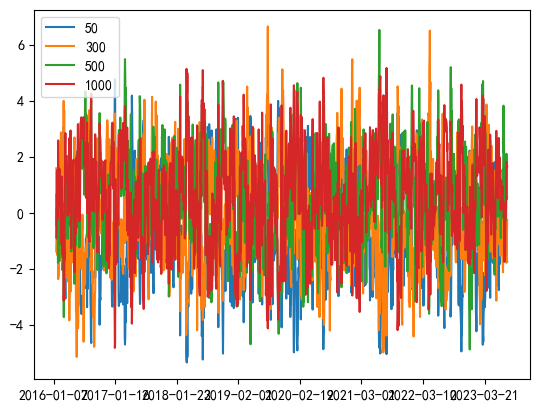

In [7779]:
DF1.T.loc[['50','300','500','1000'],'2016-01-07':].T.plot()

In [7745]:
DF = DF.dropna(how='all',axis=1)

In [7784]:
sigs_com = {}
for d,s in a.T.dropna(how='all').iterrows():
    sigs_com[d] = {'50':0,
                   '300':0,
                   '500':0,
                   '1000':0}
    if (np.isnan(s['50'])):
        if np.isnan(s['300']):
            sigs_com[d]['50'] = -s['1000'] 
            sigs_com[d]['1000'] = s['1000']
        else:
            sigs_com[d]['50'] = s['300']
            if np.isnan(s['1000']):
                sigs_com[d]['1000'] = s['500']
            else:
                sigs_com[d]['1000'] = s['1000']
    
    elif (np.isnan(s['1000'])):
        if np.isnan(s['500']):
            sigs_com[d]['1000'] = -s['50'] 
            sigs_com[d]['50'] = s['50']
        else:
            sigs_com[d]['1000'] = s['500']
            if np.isnan(s['50']):
                
                sigs_com[d]['50'] = s['300']
            else:
                sigs_com[d]['50'] = s['50']

    else:
        sigs_com[d]['50'] = s['50']
        sigs_com[d]['1000'] = s['1000']

In [7785]:
(pd.DataFrame(sigs_com)).diff(axis=1).abs().sum().sum()

1188.0

In [7390]:
def cal_upshadow(Index_id):
    index_ret = xy.Index_rets.loc[Index_id,:]
    upShadow = pd.Series(np.nan,index = index_ret.index)
    upShadow.loc[index_ret[index_ret>0].index] = (xy.index_high.loc[Index_id,:] - xy.cl.loc[Index_id,:])
    upShadow.loc[index_ret[index_ret<=0].index] = (xy.index_high.loc[Index_id,:] - xy.op.loc[Index_id,:])
    
    return upShadow

def cal_downshadow(Index_id):
    index_ret = xy.Index_rets.loc[Index_id,:]
    downShadow = pd.Series(np.nan,index = index_ret.index)
    downShadow.loc[index_ret[index_ret>0].index] = (-xy.index_low.loc[Index_id,:] + xy.op.loc[Index_id,:])
    downShadow.loc[index_ret[index_ret<=0].index] = (-xy.index_low.loc[Index_id,:] + xy.cl.loc[Index_id,:])
    
    return downShadow

UpShadow_idx = pd.concat([
    cal_upshadow('50').rename('50'),
    cal_upshadow('300').rename('300'),
    cal_upshadow('500').rename('500'),
    cal_upshadow('1000').rename('1000')
],axis=1).rolling(1).mean().shift(1)

DownShadow_idx = pd.concat([
    cal_downshadow('50').rename('50'),
    cal_downshadow('300').rename('300'),
    cal_downshadow('500').rename('500'),
    cal_downshadow('1000').rename('1000')
],axis=1).rolling(1).mean().shift(1)

In [6719]:
bar = (xy.cl - xy.op).abs().T[['50','300','500','1000']].dropna()

In [6725]:
bar.mean(axis=1).rolling(5).sum()[::1].loc['2016-01-04':'2023-08-04'].rolling(20).mean().dropna().shift().corr(b.abs().rolling(5).sum()[::1].loc['2016-01-04':'2023-08-04'].rolling(20).mean().dropna())

0.6872072329764131

In [6742]:
idx = RateGap.index & TN.index & b.abs().rolling(5).sum()[::1].loc['2016-01-04':'2023-08-04'].rolling(1).mean().dropna().index

<Axes: >

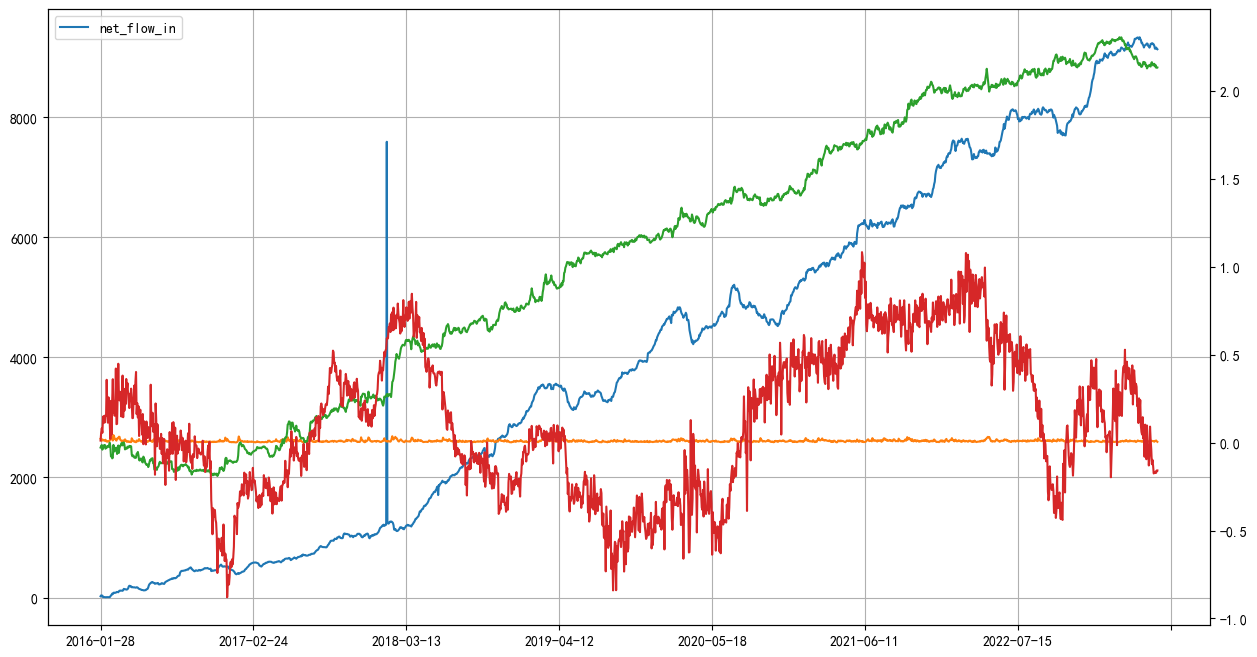

In [6745]:
# bar.mean(axis=1).rolling(1).sum()[::1].loc['2016-01-04':'2023-08-04'].ewm(5).mean().dropna().loc[idx].plot(grid=True)
TN.loc['2016-01-04':'2023-08-04'].rolling(1).mean().dropna().cumsum().loc[idx].plot(grid=True)
b.abs().rolling(1).sum()[::1].loc['2016-01-04':'2023-08-04'].ewm(1).mean().dropna().loc[idx].plot(secondary_y=True,figsize=(15,8))
b.loc[idx].loc['2016-01-04':'2023-08-04'].cumsum().plot(secondary_y=True)
(10*RateGap).loc[idx].loc['2016-01-04':'2023-08-04'].cumsum().plot(secondary_y=True)

<Axes: >

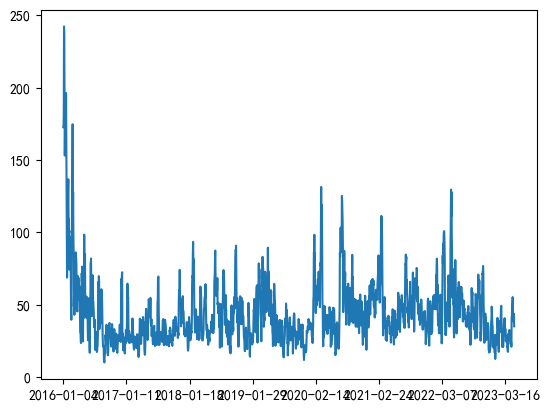

In [6638]:
bar.mask(bar<3,bar+3).mean(axis=1).rolling(5).mean().loc['2016-01-04':'2023-08-04'].plot()

<Axes: >

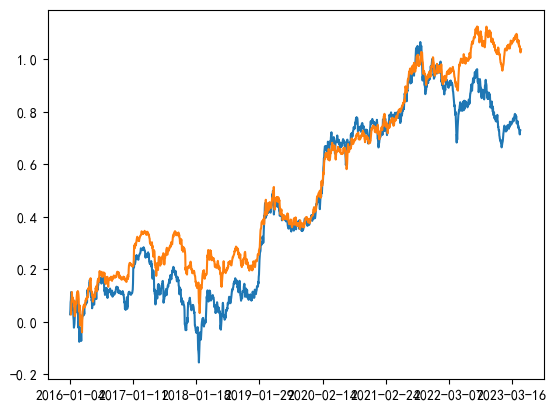

In [7765]:
(pd.DataFrame(sigs_com).T.rolling(1).mean().T.shift(0,axis=1) * xy.Index_rets.loc[:,'2016-01-04':'2023-08-04']).T.dropna(how='all').T.sum().cumsum().plot()
b.cumsum().plot()

In [7519]:
amp = 0.3
DF1 = DF.T.copy()
DF1['50'] = DF.loc['50'] * 0.6 + DF.loc['300'] * 0.4
DF1['1000'] = DF.loc['1000'] * 0.6 + DF.loc['500'] * 0.4
# DF1.loc[DF1.dropna()[DF1.dropna().std(axis=1)<amp].index,:] = pd.DataFrame(np.nan, index=DF1.dropna()[DF1.dropna().std(axis=1)<amp].index, columns=DF1.dropna()[DF1.dropna().std(axis=1)<amp].columns)
# DF1 = DF1.ffill().dropna()


# DF1['300'] = DF.loc['50'] * 0.4 + DF.loc['300'] * 0.6
# DF1['500'] = DF.loc['1000'] * 0.4 + DF.loc['500'] * 0.6

1190.0 0.0
yoy: 0.41437289446402603 
 mdd: -0.13002135525368574 
 sharpe: 2.102062911491699 
 rankIC: 0.1314156796390299 
 rankIR: 0.13252798267495686 
 win%: 0.565707839819515 
 gain_loss%: -1.095005594634655


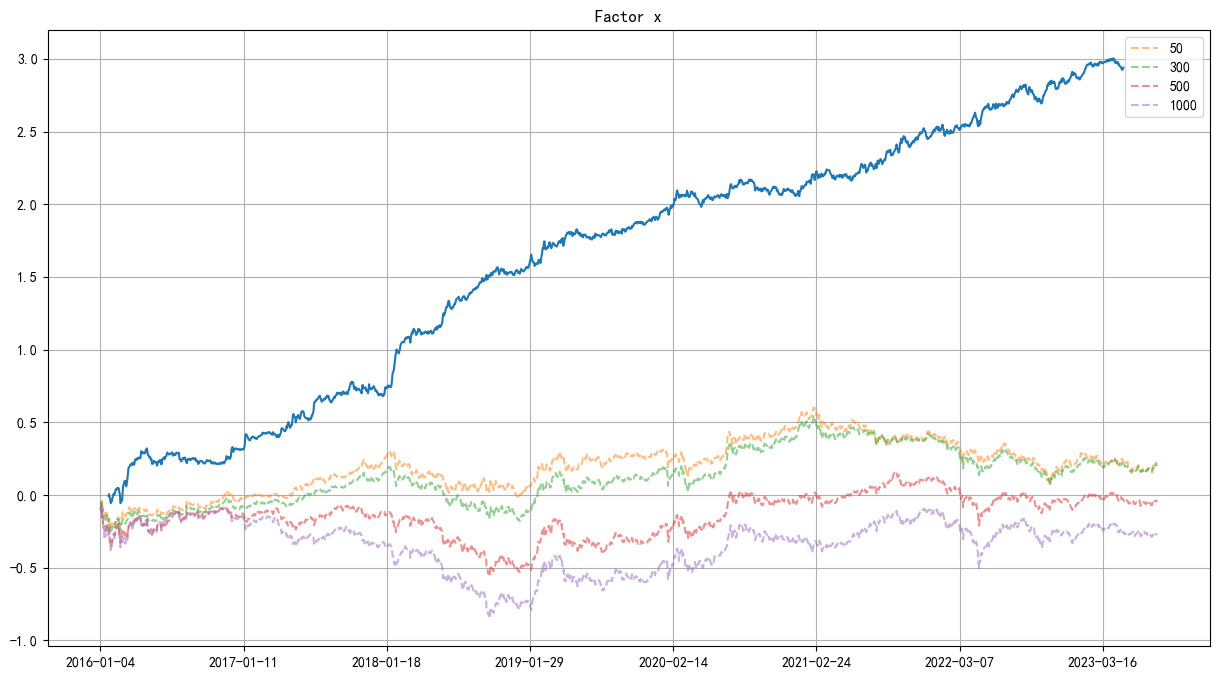

In [7788]:
a,b = xy.single_Factor_backtest(
    # DF1.rolling(1).mean().T.loc[['50','300','500','1000'],'2016-01-04':'2023-08-04'],
    pd.DataFrame(sigs_com).T.rolling(1).mean().T.loc[['50','1000'],'2016-01-04':'2023-08-04'],
    # a.T[['1000','50']].fillna(0).T,
    # (DF.loc[['50','300','500','1000'],'2016-01-04':'2023-10-04'].T.rolling(1).mean().dropna().T),
    xy.Index_rets.loc[['50','300','500','1000'],'2016-01-04':'2023-08-04'],
    1,
    0.00,
    'x')

In [7336]:
a.T[['1000','50']].ffill().T

2016-01-22  2016-01-25  2016-01-26  2016-01-27  2016-01-28  2016-01-29  \
1000         NaN         1.0         1.0         1.0         1.0         1.0   
50           NaN        -1.0        -1.0        -1.0        -1.0        -1.0   

      2016-02-01  2016-02-02  2016-02-03  2016-02-04  ...  2023-04-25  \
1000         1.0         1.0         1.0         1.0  ...         1.0   
50          -1.0        -1.0        -1.0        -1.0  ...        -1.0   

      2023-04-26  2023-04-27  2023-04-28  2023-05-04  2023-05-05  2023-05-08  \
1000         1.0         1.0         1.0         1.0         1.0         1.0   
50          -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   

      2023-05-09  2023-05-10  2023-05-11  
1000         1.0         1.0         1.0  
50          -1.0        -1.0        -1.0  

[2 rows x 1773 columns]

<Axes: >

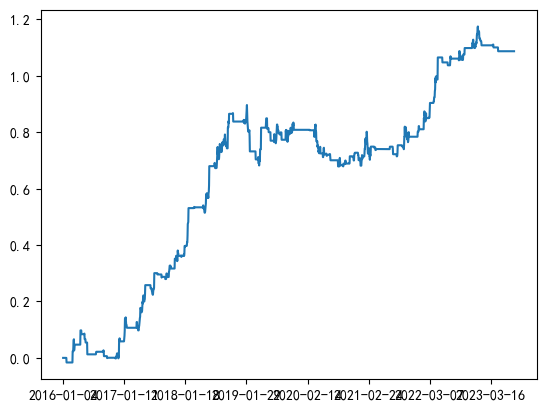

In [7792]:
(# (a.loc['1000'][a.loc['1000']!=0] * xy.Index_rets.loc['1000','2016-01-04':'2023-08-04']).rename('1000').fillna(0)
    (a.loc['1000'][a.loc['1000']<=0] * xy.Index_rets.loc['1000','2016-01-04':'2023-08-04']).rename('1000').fillna(0)
    # (a.loc['300'][a.loc['300']!=0] * xy.Index_rets.loc['300','2016-01-04':'2023-08-04']).rename('1000').fillna(0)+
    # (a.loc['500'][a.loc['500']!=0] * xy.Index_rets.loc['500','2016-01-04':'2023-08-04']).rename('1000').fillna(0)
).dropna().sort_index().cumsum().plot()

594.0

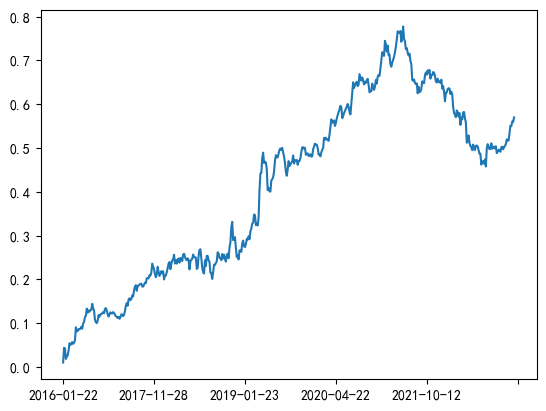

In [7791]:
(a.loc['50'][a.loc['50']>0] * xy.Index_rets.loc['50','2016-01-04':'2023-08-04']).dropna().cumsum().plot()
# xy.Index_rets.loc['50','2016-01-04':'2023-08-04'].cumsum().plot()
a.loc['50'].diff().abs().sum()

0.15048860478007867
1 0.9913232104121475
2 0.9913232104121475
3 0.9913232104121475
4 0.9913232104121475


<Axes: >

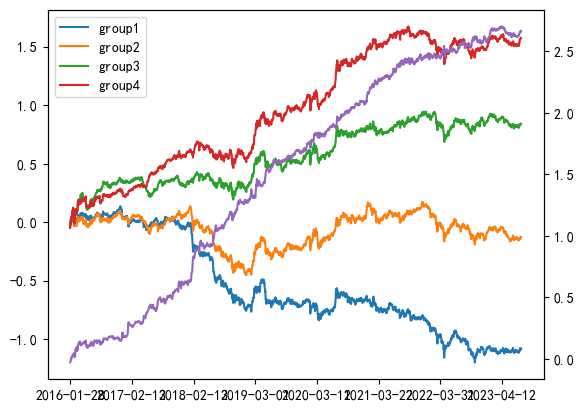

In [7538]:
# 分组收益率
gr_DF = xy.cal_rate_group(
    DF.loc[['50','300','500', '1000'],'2016-01-28':].T.rolling(1).mean().T.shift(0,axis=1),
    # DF1.T.loc[['50','300','500', '1000'],'2016-01-28':].T.rolling(1).mean().T.shift(0,axis=1),
    # pd.DataFrame(sigs_com).T.rolling(1).mean().T.loc[['50','1000'],'2016-01-04':'2023-08-04'],
    xy.Index_rets.loc[['50','300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_DF.cumsum().plot()
(-gr_DF.iloc[:,0] + gr_DF.iloc[:,3]).cumsum().plot(secondary_y=True,)

0.16632400872231115
1 0.0
2 1.0
3 0.0
4 1.0


<Axes: >

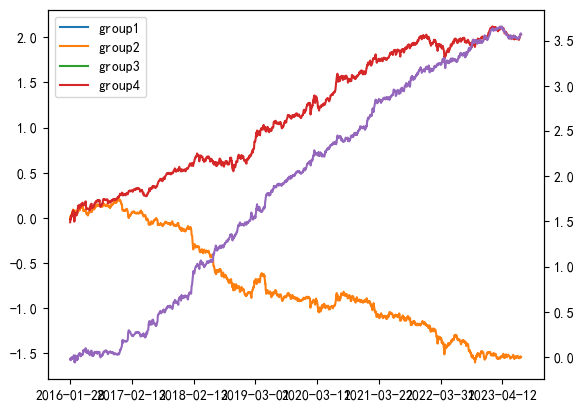

In [7539]:
# 分组收益率
gr_DF = xy.cal_rate_group(
    # DF.loc[['50','300','500', '1000'],'2016-01-28':].T.rolling(1).mean().T.shift(0,axis=1),
    # DF1.T.loc[['50','300','500', '1000'],'2016-01-28':].T.rolling(1).mean().T.shift(0,axis=1),
    pd.DataFrame(sigs_com).T.rolling(1).mean().T.loc[['50','1000'],'2016-01-04':'2023-08-04'],
    xy.Index_rets.loc[['50','300', '500', '1000'],'2016-01-28':],
    group_num=4,
    masks=1
)
gr_DF.cumsum().plot()
(-gr_DF.iloc[:,1] + gr_DF.iloc[:,3]).cumsum().plot(secondary_y=True,)

In [7358]:
LDAU = pd.read_csv('factors/Macro/XAU.csv',index_col=0).iloc[:,0]
SHAU = pd.read_csv('factors/Macro/SHAU.csv',index_col=0,header=None).iloc[:,0]

RateGap = (LDAU/SHAU).pct_change()

In [6699]:
TN = pd.read_csv('to_north.csv',index_col=0)#.ewm(20).std().net_flow_in.diff()

In [2158]:
DF = DF.loc[['50','1000'],'2016-01-07':].T.ewm(2).mean().T

In [ ]:
cs = []
for _r5, _r1000 in zip(xy.Index_rets.loc['50',:].T.rolling(20),xy.Index_rets.loc['1000',:].T.rolling(10)):
    cs.append(_r5.corr(_r1000))

In [ ]:
CS50_1000 = pd.Series(cs,index=xy.Index_rets.loc['50',:].T.index)

In [ ]:
CS50_1000.ewm(10).mean().cumsum().plot()
b.cumsum().plot(secondary_y=True)

In [5526]:
(CS50_1000.ewm(10).mean().diff().shift(1)).corr(RET)

0.01660668997481666

<Axes: >

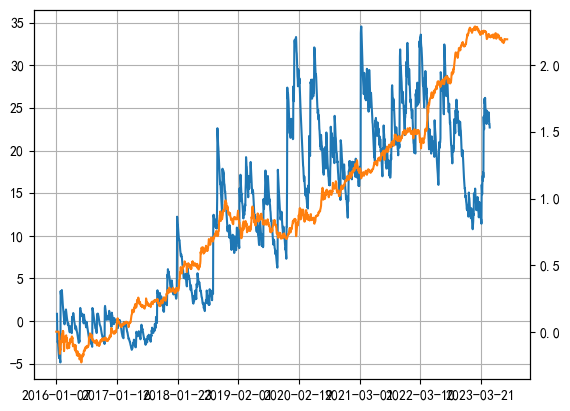

In [5481]:
TN.shift(1).cumsum().plot(grid=True)
RET.cumsum().plot(secondary_y=True)

In [5432]:
TN.describe()

count    1785.000000
mean        0.012318
std         1.168078
min        -1.976945
25%        -0.512900
50%        -0.220614
75%         0.049124
max        17.024415
Name: net_flow_in, dtype: float64

In [3640]:
idxn = '300'

 | sharpe_shrd=0.0: -0.3174  | pnl_shrd=0.0: -0.4548  | count_ratio_shrd=0.0: 0.9995
 | sharpe_shrd=0.4: -0.1944  | pnl_shrd=0.4: -0.253  | count_ratio_shrd=0.4: 0.8297
 | sharpe_shrd=0.8: 0.0338  | pnl_shrd=0.8: 0.0397  | count_ratio_shrd=0.8: 0.6725
 | sharpe_shrd=1.2: 0.0421  | pnl_shrd=1.2: 0.0445  | count_ratio_shrd=1.2: 0.5311
 | sharpe_shrd=1.6: -0.1982  | pnl_shrd=1.6: -0.1812  | count_ratio_shrd=1.6: 0.4028
 | sharpe_shrd=2.0: -0.4135  | pnl_shrd=2.0: -0.345  | count_ratio_shrd=2.0: 0.3079
 | sharpe_shrd=2.4: -0.1475  | pnl_shrd=2.4: -0.0984  | count_ratio_shrd=2.4: 0.22
 | sharpe_shrd=2.8: -0.4428  | pnl_shrd=2.8: -0.2398  | count_ratio_shrd=2.8: 0.1479
 | sharpe_shrd=3.2: -0.4864  | pnl_shrd=3.2: -0.2287  | count_ratio_shrd=3.2: 0.1059
 | sharpe_shrd=3.6: -0.4281  | pnl_shrd=3.6: -0.1635  | count_ratio_shrd=3.6: 0.0715


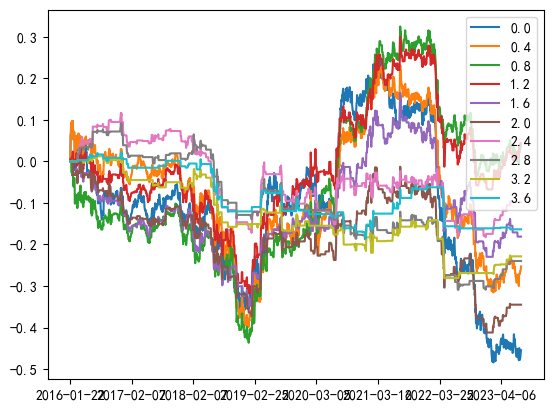

In [3641]:
for _i in range(0,40,4):
    i = _i/10
    R = (pd.concat([
        xy.Index_rets.loc[idxn,DF.loc[idxn][DF.loc[idxn]>i].index],
        -xy.Index_rets.loc[idxn,DF.loc[idxn][DF.loc[idxn]<-i].index]
    ]).sort_index() - (pd.concat([
        pd.Series(1,DF.loc[idxn][DF.loc[idxn]>i].index),
        pd.Series(-1,DF.loc[idxn][DF.loc[idxn]<-i].index)
    ]).sort_index().diff().abs()*0.001)).rename(f'{i}')

    R = pd.Series(R,index=DF.loc[idxn].index).fillna(0)
    R.cumsum().ffill().plot(legend=True)
    print(f' | sharpe_shrd={R.name}:',
          round((R.sum()/R.dropna().shape[0]*240) / (R.dropna().std()*(250**0.5)),4),
          f' | pnl_shrd={R.name}:',
          round(R.sum(),4),
          f' | count_ratio_shrd={R.name}:',
          round(R[R!=0].shape[0]/R.shape[0],4))
    # if i == 0.9:
    #     break

In [654]:
shrd = 1.2

_a = pd.Series(a.loc['1000'][DF.dropna(how='all').loc[:,:].diff().abs().sum()>shrd],index = a.columns).ffill()
_a1 = pd.Series(a.loc['50'][DF.dropna(how='all').loc[:,:].diff().abs().sum()>shrd],index = a.columns).ffill()

RET = pd.Series(
          pd.concat([    
            (_a * xy.Index_rets.loc['1000',:]),
            # (a.loc['50'][DF.dropna(how='all').abs().sum()>shrd] * xy.Index_rets.loc['50',:])
        ],axis=1).sum(axis=1)
,index=a.columns)


RET1 = pd.Series(
          pd.concat([    
            (_a1 * xy.Index_rets.loc['50',:]),
            # (a.loc['50'][DF.dropna(how='all').abs().sum()>shrd] * xy.Index_rets.loc['50',:])
        ],axis=1).sum(axis=1)
,index=a.columns)


fee_series = ((_a.fillna(0).diff()).abs()*0.001)
fee_series1 = ((_a1.fillna(0).diff()).abs()*0.001)

1.6857080495871561
-0.201


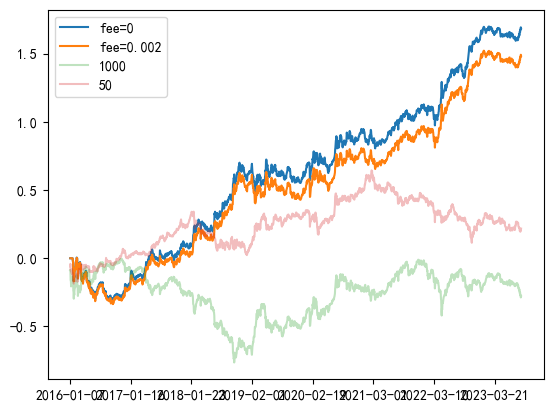

In [655]:
(RET).cumsum().rename('fee=0').plot(legend=True)
(RET-fee_series).cumsum().rename('fee=0.002').plot(legend=True)
xy.Index_rets.loc['1000',fee_series.index].cumsum().plot(legend=True,alpha=0.3)
xy.Index_rets.loc['50',fee_series.index].cumsum().plot(legend=True,alpha=0.3)
print(RET.sum())
print((-fee_series).sum())

0.7778776910941494
-0.201


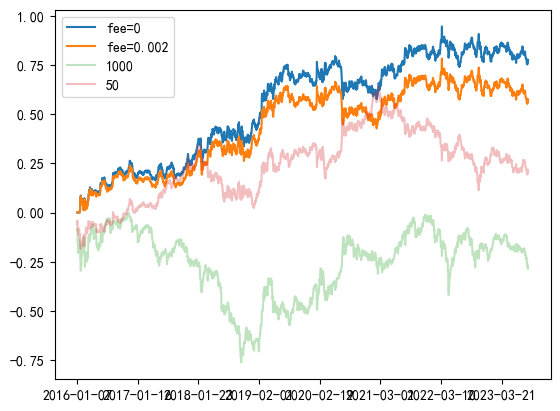

In [656]:
(RET1).cumsum().rename('fee=0').plot(legend=True)
(RET1-fee_series1).cumsum().rename('fee=0.002').plot(legend=True)
xy.Index_rets.loc['1000',fee_series.index].cumsum().plot(legend=True,alpha=0.3)
xy.Index_rets.loc['50',fee_series.index].cumsum().plot(legend=True,alpha=0.3)
print(RET1.sum())
print((-fee_series1).sum())

2.061585740681305

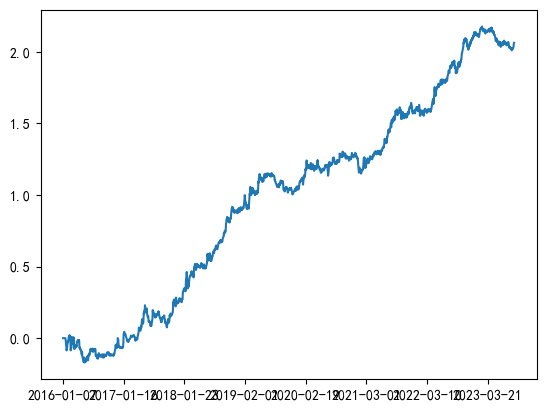

In [657]:
((RET-fee_series)+ (RET1-fee_series1)).cumsum().plot()
((RET-fee_series)+ (RET1-fee_series1)).sum()

In [662]:
aa.diff().abs().sum()

112.0

In [256]:
aa1

2016-01-07    1.0
2016-01-08    1.0
2016-01-11    1.0
2016-01-12    1.0
2016-01-13    1.0
             ... 
2023-08-22   -1.0
2023-08-23   -1.0
2023-08-24   -1.0
2023-08-25   -1.0
2023-08-28   -1.0
Name: 50, Length: 1859, dtype: float64

 | sharpe_shrd=0.0: 1.6589  | pnl_shrd=0.0: 2.5006  | count_ratio_shrd=0.0: 344 4
 | sharpe_shrd=0.5: 1.6589  | pnl_shrd=0.5: 2.5006  | count_ratio_shrd=0.5: 344 4
 | sharpe_shrd=1.0: 1.6544  | pnl_shrd=1.0: 2.4938  | count_ratio_shrd=1.0: 344 4
 | sharpe_shrd=1.5: 1.6443  | pnl_shrd=1.5: 2.4789  | count_ratio_shrd=1.5: 340 4
 | sharpe_shrd=2.0: 1.6225  | pnl_shrd=2.0: 2.4476  | count_ratio_shrd=2.0: 340 4
 | sharpe_shrd=2.5: 1.5428  | pnl_shrd=2.5: 2.3301  | count_ratio_shrd=2.5: 332 4
 | sharpe_shrd=3.0: 1.4996  | pnl_shrd=3.0: 2.2672  | count_ratio_shrd=3.0: 328 4
 | sharpe_shrd=3.5: 1.5028  | pnl_shrd=3.5: 2.2709  | count_ratio_shrd=3.5: 324 4
 | sharpe_shrd=4.0: 1.4769  | pnl_shrd=4.0: 2.2314  | count_ratio_shrd=4.0: 316 4
 | sharpe_shrd=4.5: 1.4285  | pnl_shrd=4.5: 2.1619  | count_ratio_shrd=4.5: 304 4


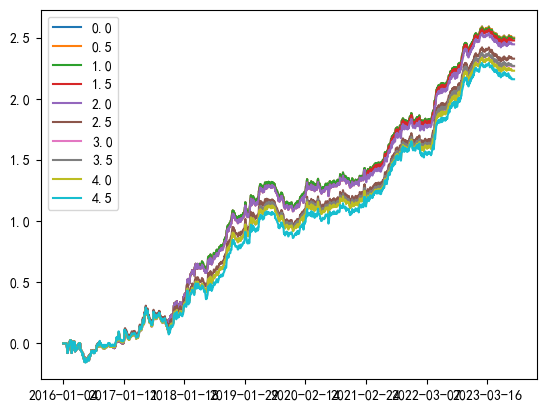

In [3338]:
for _s in range(0,50,5):
    shrd0 = _s/10
    aa = pd.Series(a.loc['1000'][DF.dropna(how='all').diff().abs().sum()>shrd0],index = a.columns).ffill()
    aa1 = pd.Series(a.loc['50'][DF.dropna(how='all').diff().abs().sum()>shrd0],index = a.columns).ffill()
    # aa = aa.mask(aa==-1,0)
    # aa1 = aa1.mask(aa1==1,0)

    _fee_series = ((aa.fillna(0).diff()).abs()*0.001)
    _fee_series1 = ((aa1.fillna(0).diff()).abs()*0.001)
    
    rr1000 = ((aa * xy.Index_rets.loc['1000',:]).fillna(0) - _fee_series).rename('1000')
    rr50 = ((aa1 * xy.Index_rets.loc['50',:]).fillna(0) - _fee_series1).rename('50')
    
    rr_com = (rr1000+rr50).rename(shrd0).fillna(0)
    # (rr50).plot(legend=True)
    # (rr1000).plot(legend=True)
    print(f' | sharpe_shrd={rr_com.name}:',
          round((rr_com.sum()/rr_com.dropna().shape[0]*240) / (rr_com.dropna().std()*(250**0.5)),4),
          f' | pnl_shrd={rr_com.name}:',
          round(rr_com.sum(),4),
          f' | count_ratio_shrd={rr_com.name}:',
          round((aa.diff().abs().sum())),4)
    rr_com.cumsum().plot(legend=True)
    # if shrd0 == 0.8:
    #     break

<Axes: >

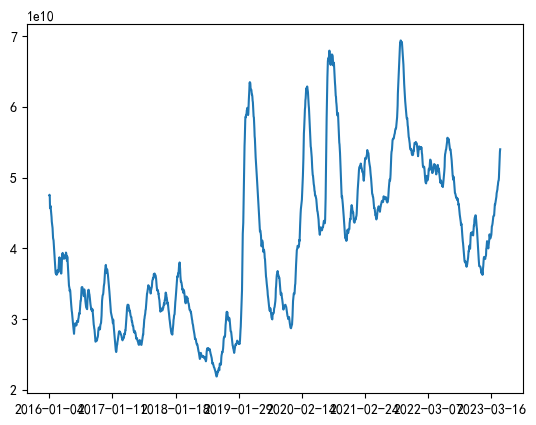

In [1239]:
xy.index_volume.sum().ewm(20).mean().loc['2016-01-04':].plot()

In [1290]:
b

2016-01-07    0.0
2016-01-08    0.0
2016-01-11    0.0
2016-01-12    0.0
2016-01-13    0.0
             ... 
2023-08-22    0.0
2023-08-23    0.0
2023-08-24    0.0
2023-08-25    0.0
2023-08-28    0.0
Length: 1859, dtype: float64

In [1705]:
vspeed = (xy.index_volume.loc['1000'].pct_change(250).ewm(3).mean() -  xy.index_volume.loc['1000'].pct_change(250).ewm(5).mean())

In [1706]:
filter0 = (vspeed).loc['2016-01-04':].shift(1)>0.02#  - vspeed.rolling(20).mean()
filter1 = (vspeed).loc['2016-01-04':].shift(1)<-0.02#  - vspeed.rolling(20).mean()

<Axes: >

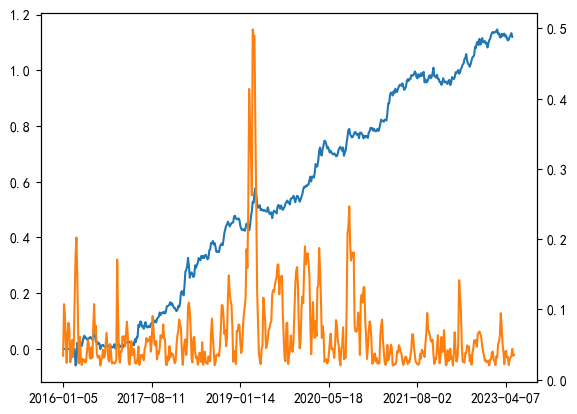

In [1707]:
b.loc[filter0.index & b.index][filter0.loc[filter0.index & b.index]].cumsum().plot()
(xy.index_volume.loc['1000'].pct_change(250).ewm(3).mean() -  xy.index_volume.loc['1000'].pct_change(250).ewm(5).mean()).loc['2016-01-04':].shift(1)[filter0].plot(secondary_y=True)

<Axes: >

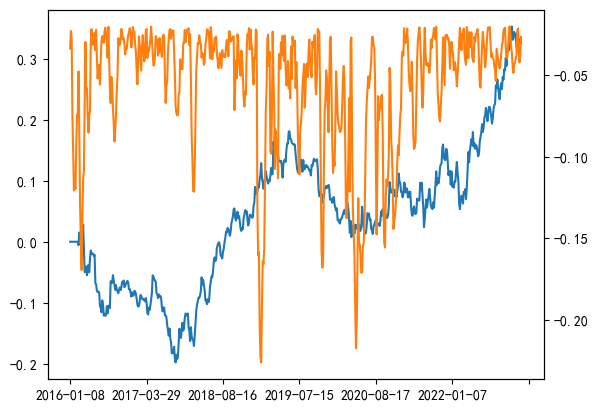

In [1704]:
b.loc[filter1.index & b.index][filter1.loc[filter1.index & b.index]].cumsum().plot()
(xy.index_volume.loc['1000'].pct_change(250).ewm(3).mean() -  xy.index_volume.loc['1000'].pct_change(250).ewm(5).mean()).loc['2016-01-04':].shift(1)[filter1].plot(secondary_y=True)

In [1280]:
(xy.index_volume.loc['1000'].pct_change(250).ewm(3).mean() -  xy.index_volume.loc['1000'].pct_change(250).ewm(5).mean()).loc['2016-01-04':].shift(1).corr(b)

0.049533515935882386

<Axes: >

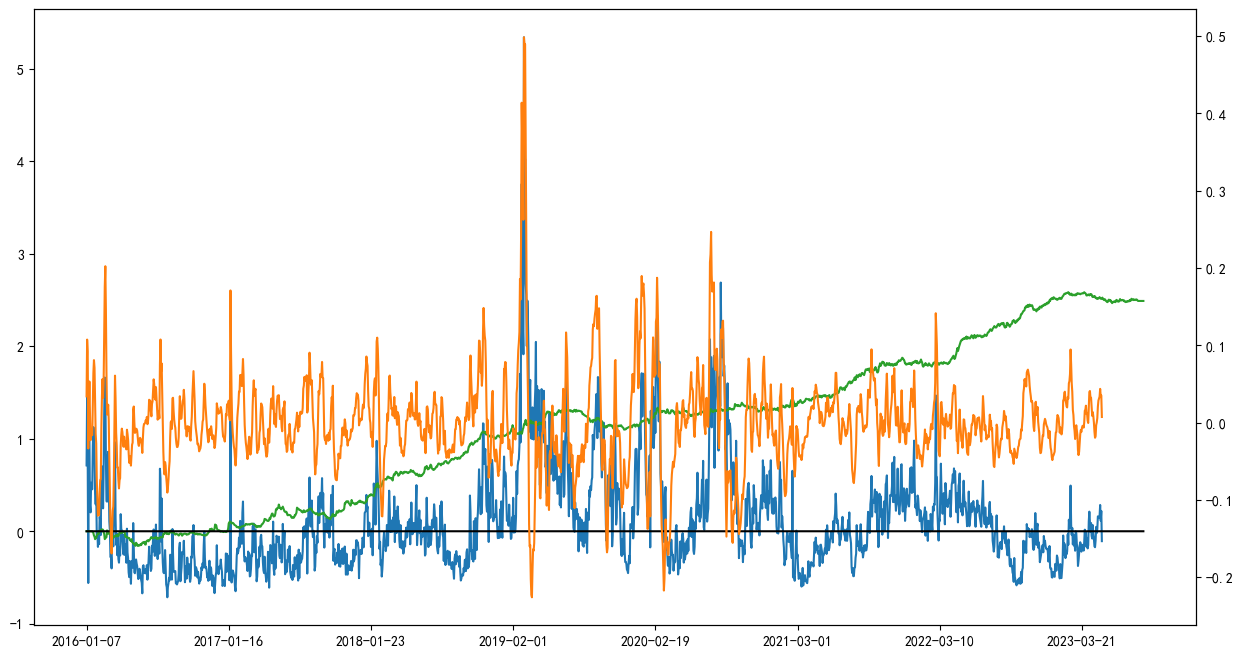

In [1284]:
xy.index_volume.loc['1000'].pct_change(250).loc['2016-01-04':].plot()
((xy.index_volume.loc['1000'].pct_change(250).ewm(3).mean() -  xy.index_volume.loc['1000'].pct_change(250).ewm(5).mean())).loc['2016-01-04':].plot(secondary_y = True)
b.cumsum().plot(figsize=(15,8))
pd.Series(0,index=b.index).plot(color='black')

<Axes: >

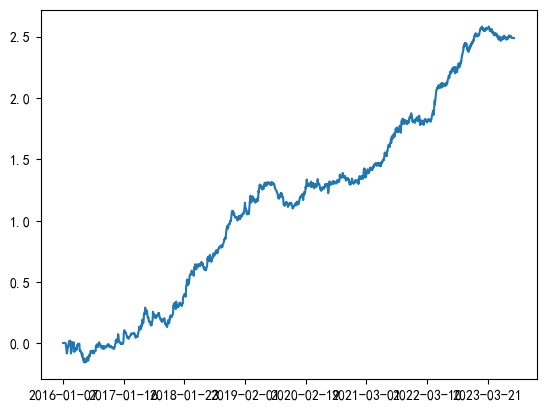

In [1223]:
b.cumsum().plot()

In [5274]:
st_ENPchg_select, st_ENPchg_ret = xy.single_Factor_backtest(f_dct['st_ad'].dropna(how='all',axis=1).loc[['50','1000'],'2017-01-07':], Index_rets.loc[['50','1000','300','500'],'2017-01-07':], 1, 0.00025, 'st_ENPchg')

KeyError: 'st_ad'

In [23]:
for i in range(1,9):
    try:   
        if i == 1:
            union_set = list(dts_dct.values())[0]
        else:   
            union_set = union_set.union(list(dts_dct.values())[i])
    except IndexError:
        break

In [24]:
dts = sorted(list(union_set))

In [25]:
f_lst = []
for d in tqdm(dts):
    date_f_lst = []
    for _fn, _df in f_dct.items():
        try:
            if _df[d].dropna().shape[0] == 0:
                continue
            else:
                date_f_lst.append(_df[d].dropna().rename(_fn))
        except Exception as e:
            print(d,e)
            continue
            
    date_f_df = pd.concat(date_f_lst,axis=1)
    date_f_df['date'] = d
    date_f_df['ret'] = Index_rets.loc[date_f_df.index, d].rank()
    
    f_lst.append(date_f_df) 

 10%|███████▌                                                                      | 174/1785 [00:00<00:01, 849.97it/s]

2016-01-04 '2016-01-04'
2016-01-05 '2016-01-05'
2016-01-06 '2016-01-06'
2016-01-07 '2016-01-07'
2016-01-08 '2016-01-08'
2016-01-11 '2016-01-11'
2016-01-12 '2016-01-12'
2016-01-13 '2016-01-13'
2016-01-14 '2016-01-14'
2016-01-15 '2016-01-15'
2016-01-18 '2016-01-18'
2016-01-19 '2016-01-19'
2016-01-20 '2016-01-20'
2016-01-21 '2016-01-21'
2016-01-22 '2016-01-22'
2016-01-25 '2016-01-25'
2016-01-26 '2016-01-26'
2016-01-27 '2016-01-27'
2016-01-28 '2016-01-28'
2016-01-29 '2016-01-29'
2016-02-01 '2016-02-01'
2016-02-02 '2016-02-02'
2016-02-03 '2016-02-03'
2016-02-04 '2016-02-04'
2016-02-05 '2016-02-05'
2016-02-15 '2016-02-15'
2016-02-16 '2016-02-16'
2016-02-17 '2016-02-17'
2016-02-18 '2016-02-18'
2016-02-19 '2016-02-19'
2016-02-22 '2016-02-22'
2016-02-23 '2016-02-23'
2016-02-24 '2016-02-24'
2016-02-25 '2016-02-25'
2016-02-26 '2016-02-26'
2016-02-29 '2016-02-29'
2016-03-01 '2016-03-01'
2016-03-02 '2016-03-02'
2016-03-03 '2016-03-03'
2016-03-04 '2016-03-04'
2016-03-07 '2016-03-07'
2016-03-08 '2016

 24%|██████████████████▍                                                           | 422/1785 [00:00<00:01, 726.49it/s]

2016-09-19 '2016-09-19'
2016-09-20 '2016-09-20'
2016-09-21 '2016-09-21'
2016-09-22 '2016-09-22'
2016-09-23 '2016-09-23'
2016-09-26 '2016-09-26'
2016-09-27 '2016-09-27'
2016-09-28 '2016-09-28'
2016-09-29 '2016-09-29'
2016-09-30 '2016-09-30'
2016-10-10 '2016-10-10'
2016-10-11 '2016-10-11'
2016-10-12 '2016-10-12'
2016-10-13 '2016-10-13'
2016-10-14 '2016-10-14'
2016-10-17 '2016-10-17'
2016-10-18 '2016-10-18'
2016-10-19 '2016-10-19'
2016-10-20 '2016-10-20'
2016-10-21 '2016-10-21'
2016-10-24 '2016-10-24'
2016-10-25 '2016-10-25'
2016-10-26 '2016-10-26'
2016-10-27 '2016-10-27'
2016-10-28 '2016-10-28'
2016-10-31 '2016-10-31'
2016-11-01 '2016-11-01'
2016-11-02 '2016-11-02'
2016-11-03 '2016-11-03'
2016-11-04 '2016-11-04'
2016-11-07 '2016-11-07'
2016-11-08 '2016-11-08'
2016-11-09 '2016-11-09'
2016-11-10 '2016-11-10'
2016-11-11 '2016-11-11'
2016-11-14 '2016-11-14'
2016-11-15 '2016-11-15'
2016-11-16 '2016-11-16'
2016-11-17 '2016-11-17'
2016-11-18 '2016-11-18'
2016-11-21 '2016-11-21'
2016-11-22 '2016

 32%|█████████████████████████▎                                                    | 579/1785 [00:00<00:01, 756.96it/s]

2018-01-02 '2018-01-02'


 46%|███████████████████████████████████▋                                          | 816/1785 [00:01<00:01, 775.89it/s]

2019-01-02 '2019-01-02'


 63%|████████████████████████████████████████████████▊                            | 1133/1785 [00:01<00:00, 733.04it/s]

2020-01-02 '2020-01-02'


100%|█████████████████████████████████████████████████████████████████████████████| 1785/1785 [00:02<00:00, 766.05it/s]


## lgbm

In [186]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

def train_lgbm(X_train, y_train):
    evals_result = {}
    # tr_x, te_x, tr_y, te_y = train_test_split(X_train, y_train, test_size=0.05, random_state=2022)
    tr_lgb_dt = lgb.Dataset(X_train, label=y_train.values)
    # te_lgb_dt = lgb.Dataset(te_x, label=te_y.values)

    params = {
            # 'tree_method': 'gpu_hist',
            'task': 'train',  # 执行的任务类型
            'boosting_type': 'gbrt',  # 基学习器
            # 'min_gain_to_split': 0.001, 
            'objective': 'rmse',# 排序任务(目标函数)
            # 'max_position': 10,  # @NDCG 位置优化
            # 'metric_freq': 10,  # 每隔多少次输出一次度量结果
            # 'train_metric': True,  # 训练时就输出度量结果
            # 'ndcg_at': [10],
            'max_bin': 255,  # 一个整数，表示最大的桶的数量。默认值为 255。lightgbm 会根据它来自动压缩内存。如max_bin=255 时，则lightgbm 将使用uint8 来表示特征的每一个值。
            'num_iterations': 300,  # 迭代次数，即生成的树的棵数
            'learning_rate': 0.0005,  # 学习率
            'num_leaves': 15,  # 叶子数
            # 'max_depth':6,
            'tree_learner': 'serial',  # 用于并行学习，‘serial’： 单台机器的tree learner
            # 'min_data_in_leaf': 10,  # 一个叶子节点上包含的最少样本数量
            'verbose': -1,  # 显示训练时的信息
            'seed':2023,
            'n_jobs':48
        }
    a = lgb.train(params,
                  train_set=tr_lgb_dt,
                  # valid_sets=[tr_lgb_dt, te_lgb_dt],
                  # verbose_eval=300,
                  # callbacks=[lgb.log_evaluation, 
                            # lgb.early_stopping(30, first_metric_only=True),
                            # lgb.record_evaluation(evals_result)]
                 )
    return a, evals_result

In [6]:
from sklearn.linear_model import LinearRegression as LR

def linearRegresser(X_train, y_train):
    return LR().fit(X_train, y_train)

In [164]:
pd.concat(f_lst)

sts_ad_mean  st_idx_VDEA  st_idx_VDIFF  st_index_VR  st_index_VROC  \
50      -0.598414     0.784240      1.244482    -0.856908       0.716040   
300     -0.502786     0.690532      0.831788    -0.595606       0.551951   
500     -0.315428    -0.619925     -0.696237    -1.151937       0.327572   
1000    -0.226046    -0.804335     -0.845100     0.113011       0.217733   
50      -0.578070     0.976540      1.307396    -0.937141       0.799505   
...           ...          ...           ...          ...            ...   
1000          NaN          NaN           NaN          NaN            NaN   
50            NaN          NaN           NaN          NaN            NaN   
300           NaN          NaN           NaN          NaN            NaN   
500           NaN          NaN           NaN          NaN            NaN   
1000          NaN          NaN           NaN          NaN            NaN   

      st_index_WVAD    st_PSY        date  ret  st_idx_VMACD  Kur_idxETF  \
50         0.829508  0.475577  2016-01-04  4.0           NaN         NaN   
300        0.812188  0.193872  2016-01-04  3.0           NaN         NaN   
500       -0.519080  0.422294  2016-01-04  2.0           NaN         NaN   
1000      -0.954052  0.592294  2016-01-04  1.0           NaN         NaN   
50         1.386638  0.694702  2016-01-05  4.0           NaN         NaN   
...             ...       ...         ...  ...           ...         ...   
1000            NaN       NaN  2023-05-23  4.0           NaN   -0.589255   
50              NaN       NaN  2023-05-24  1.0           NaN   -1.841669   
300             NaN       NaN  2023-05-24  2.0           NaN   -0.465877   
500             NaN       NaN  2023-05-24  3.0           NaN    0.808005   
1000            NaN       NaN  2023-05-24  4.0           NaN    1.011826   

          _SPS  ENP_fn_chg  
50         NaN         NaN  
300        NaN         NaN  
500        NaN         NaN  
1000       NaN         NaN  
50         NaN         NaN  
...        ...         ...  
1000 -1.336306         NaN  
50   -1.336306         NaN  
300  -0.267261         NaN  
500   0.267261         NaN  
1000 -0.801784         NaN  

[7184 rows x 13 columns]

In [171]:
lgbm_data = pd.concat(f_lst).dropna()[['sts_ad_mean',
                                       'st_idx_VDEA',
                                       'st_idx_VDIFF',
                                       'st_index_VR',
                                       'st_index_VROC',
                                       'st_index_WVAD',
                                       'st_idx_VMACD',
                                       'st_PSY',
                                       'Kur_idxETF',
                                       '_SPS',
                                       'ENP_fn_chg',
                                       'date',
                                       'ret',
                                      ]]

In [189]:
train_win_size = 250
step_wide = 20

date_lst = sorted(list(lgbm_data.date.unique()))
pred0_lst = []

for i in tqdm(range(len(date_lst) - train_win_size)[::step_wide]):
    train_dates = date_lst[i:i+train_win_size]
    pred_dates = date_lst[i+train_win_size:i+train_win_size+step_wide]
    
    X_train = lgbm_data.loc[lgbm_data.date.isin(train_dates),~lgbm_data.columns.isin(['ret','date'])]
    # X_train = X_train.loc[~X_train.index.isin(['sz100','2000'])]
    y_train = lgbm_data.loc[lgbm_data.date.isin(train_dates),lgbm_data.columns.isin(['ret'])]
    # y_train = y_train.loc[~y_train.index.isin(['sz100','2000'])]

    X_test = lgbm_data.loc[lgbm_data.date.isin(pred_dates),~lgbm_data.columns.isin(['ret','date'])]
    # X_test = X_test.loc[~X_test.index.isin(['sz100','2000'])]
    y_test = lgbm_data.loc[lgbm_data.date.isin(pred_dates),lgbm_data.columns.isin(['ret'])]
    # y_test = y_test.loc[~y_test.index.isin(['sz100','2000'])]

    model,evals_result = train_lgbm(X_train, y_train)
    # display(np.array(X_train).shape, np.array(y_train).shape)
    # model = np.linalg.lstsq(X_train, y_train,rcond=None)[0].T
    
    _pred0 = model.predict(X_test.dropna())#.loc[X_test.index.isin(['sz100','2000'])]
    # _pred0 = np.matmul(model, X_test.dropna().T).T
    
    display(pred_dates[0],pred_dates[-1],np.corrcoef(y_test.values.reshape(-1) ,np.array(_pred0).reshape(-1)))
    
    pred0 = pd.Series(np.array(_pred0).reshape(-1), y_test.index).rename(i)
    pred0_date = lgbm_data.loc[lgbm_data.date.isin(pred_dates)].date
    
    
    pred0_lst.append(pd.concat([pred0,pred0_date],axis=1))
    

  0%|                                                                                                                                                                                                                | 0/62 [00:00<?, ?it/s]

'2018-04-17'

'2018-05-16'

array([[ 1.        , -0.01596936],
       [-0.01596936,  1.        ]])

  2%|███▏                                                                                                                                                                                                    | 1/62 [00:00<00:25,  2.38it/s]

'2018-05-17'

'2018-06-13'

array([[1.      , 0.058407],
       [0.058407, 1.      ]])

  3%|██████▍                                                                                                                                                                                                 | 2/62 [00:00<00:26,  2.29it/s]

'2018-06-14'

'2018-07-12'

array([[1.        , 0.21652132],
       [0.21652132, 1.        ]])

  5%|█████████▋                                                                                                                                                                                              | 3/62 [00:01<00:27,  2.17it/s]

'2018-07-13'

'2018-08-09'

array([[1.       , 0.3147312],
       [0.3147312, 1.       ]])

  6%|████████████▉                                                                                                                                                                                           | 4/62 [00:01<00:27,  2.12it/s]

'2018-08-10'

'2018-09-06'

array([[1.        , 0.03737233],
       [0.03737233, 1.        ]])

  8%|████████████████▏                                                                                                                                                                                       | 5/62 [00:02<00:27,  2.07it/s]

'2018-09-07'

'2018-10-12'

array([[ 1.        , -0.34065714],
       [-0.34065714,  1.        ]])

 10%|███████████████████▎                                                                                                                                                                                    | 6/62 [00:02<00:27,  2.07it/s]

'2018-10-15'

'2018-11-09'

array([[1.        , 0.10624437],
       [0.10624437, 1.        ]])

 11%|██████████████████████▌                                                                                                                                                                                 | 7/62 [00:03<00:26,  2.08it/s]

'2018-11-12'

'2018-12-07'

array([[ 1.        , -0.17145228],
       [-0.17145228,  1.        ]])

 13%|█████████████████████████▊                                                                                                                                                                              | 8/62 [00:03<00:26,  2.05it/s]

'2018-12-10'

'2019-01-09'

array([[1.        , 0.16733695],
       [0.16733695, 1.        ]])

 15%|█████████████████████████████                                                                                                                                                                           | 9/62 [00:04<00:25,  2.05it/s]

'2019-01-10'

'2019-02-13'

array([[1.        , 0.11654144],
       [0.11654144, 1.        ]])

 16%|████████████████████████████████                                                                                                                                                                       | 10/62 [00:04<00:25,  2.02it/s]

'2019-02-14'

'2019-03-13'

array([[1.       , 0.1159837],
       [0.1159837, 1.       ]])

 18%|███████████████████████████████████▎                                                                                                                                                                   | 11/62 [00:05<00:24,  2.04it/s]

'2019-03-14'

'2019-04-11'

array([[1.00000000e+00, 8.06403176e-04],
       [8.06403176e-04, 1.00000000e+00]])

 19%|██████████████████████████████████████▌                                                                                                                                                                | 12/62 [00:05<00:25,  1.98it/s]

'2019-04-12'

'2019-05-14'

array([[1.        , 0.00836453],
       [0.00836453, 1.        ]])

 21%|█████████████████████████████████████████▋                                                                                                                                                             | 13/62 [00:06<00:24,  1.99it/s]

'2019-05-15'

'2019-06-12'

array([[1.        , 0.14518942],
       [0.14518942, 1.        ]])

 23%|████████████████████████████████████████████▉                                                                                                                                                          | 14/62 [00:06<00:24,  1.99it/s]

'2019-06-13'

'2019-07-10'

array([[1.        , 0.30424252],
       [0.30424252, 1.        ]])

 24%|████████████████████████████████████████████████▏                                                                                                                                                      | 15/62 [00:07<00:23,  1.99it/s]

'2019-07-11'

'2019-08-07'

array([[1.       , 0.0027606],
       [0.0027606, 1.       ]])

 26%|███████████████████████████████████████████████████▎                                                                                                                                                   | 16/62 [00:07<00:23,  1.94it/s]

'2019-08-08'

'2019-09-04'

array([[1.        , 0.28911911],
       [0.28911911, 1.        ]])

 27%|██████████████████████████████████████████████████████▌                                                                                                                                                | 17/62 [00:08<00:22,  1.97it/s]

'2019-09-05'

'2019-10-10'

array([[ 1.        , -0.16793209],
       [-0.16793209,  1.        ]])

 29%|█████████████████████████████████████████████████████████▊                                                                                                                                             | 18/62 [00:08<00:22,  1.99it/s]

'2019-10-11'

'2019-11-07'

array([[ 1.        , -0.00456734],
       [-0.00456734,  1.        ]])

 31%|████████████████████████████████████████████████████████████▉                                                                                                                                          | 19/62 [00:09<00:21,  1.96it/s]

'2019-11-08'

'2019-12-05'

array([[ 1.        , -0.00803895],
       [-0.00803895,  1.        ]])

 32%|████████████████████████████████████████████████████████████████▏                                                                                                                                      | 20/62 [00:09<00:21,  1.96it/s]

'2019-12-06'

'2020-01-06'

array([[1.        , 0.24828671],
       [0.24828671, 1.        ]])

 34%|███████████████████████████████████████████████████████████████████▍                                                                                                                                   | 21/62 [00:10<00:20,  1.96it/s]

'2020-01-07'

'2020-02-11'

array([[1.        , 0.01920662],
       [0.01920662, 1.        ]])

 35%|██████████████████████████████████████████████████████████████████████▌                                                                                                                                | 22/62 [00:10<00:20,  1.95it/s]

'2020-02-12'

'2020-03-10'

array([[1.        , 0.06969959],
       [0.06969959, 1.        ]])

 37%|█████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 23/62 [00:11<00:20,  1.93it/s]

'2020-03-11'

'2020-04-08'

array([[ 1.        , -0.04254387],
       [-0.04254387,  1.        ]])

 39%|█████████████████████████████████████████████████████████████████████████████                                                                                                                          | 24/62 [00:11<00:19,  1.92it/s]

'2020-04-09'

'2020-05-11'

array([[1.        , 0.22988298],
       [0.22988298, 1.        ]])

 40%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 25/62 [00:12<00:19,  1.93it/s]

'2020-05-12'

'2020-06-08'

array([[ 1.        , -0.21337159],
       [-0.21337159,  1.        ]])

 42%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                   | 26/62 [00:12<00:18,  1.95it/s]

'2020-06-09'

'2020-07-08'

array([[ 1.        , -0.04945401],
       [-0.04945401,  1.        ]])

 44%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                | 27/62 [00:13<00:17,  1.97it/s]

'2020-07-09'

'2020-08-05'

array([[1.        , 0.17495402],
       [0.17495402, 1.        ]])

 45%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                             | 28/62 [00:13<00:17,  1.97it/s]

'2020-08-06'

'2020-09-02'

array([[ 1.        , -0.11710715],
       [-0.11710715,  1.        ]])

 47%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 29/62 [00:14<00:16,  2.00it/s]

'2020-09-03'

'2020-09-30'

array([[ 1.        , -0.15258827],
       [-0.15258827,  1.        ]])

 48%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                      | 30/62 [00:14<00:15,  2.03it/s]

'2020-10-09'

'2020-11-05'

array([[ 1.        , -0.06809731],
       [-0.06809731,  1.        ]])

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 31/62 [00:15<00:15,  2.00it/s]

'2020-11-06'

'2020-12-03'

array([[1.        , 0.10102516],
       [0.10102516, 1.        ]])

 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                | 32/62 [00:15<00:14,  2.01it/s]

'2020-12-04'

'2020-12-31'

array([[ 1.       , -0.0453339],
       [-0.0453339,  1.       ]])

 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 33/62 [00:16<00:14,  2.03it/s]

'2021-01-04'

'2021-01-29'

array([[1.       , 0.3006563],
       [0.3006563, 1.       ]])

 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 34/62 [00:16<00:13,  2.03it/s]

'2021-02-01'

'2021-03-05'

array([[1.        , 0.14401595],
       [0.14401595, 1.        ]])

 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 35/62 [00:17<00:13,  2.05it/s]

'2021-03-08'

'2021-04-02'

array([[ 1.       , -0.0186956],
       [-0.0186956,  1.       ]])

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 36/62 [00:17<00:12,  2.03it/s]

'2021-04-06'

'2021-05-06'

array([[ 1.        , -0.02899673],
       [-0.02899673,  1.        ]])

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 37/62 [00:18<00:12,  1.99it/s]

'2021-05-07'

'2021-06-03'

array([[1.        , 0.04561085],
       [0.04561085, 1.        ]])

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 38/62 [00:18<00:11,  2.01it/s]

'2021-06-04'

'2021-07-02'

array([[1.      , 0.025366],
       [0.025366, 1.      ]])

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 39/62 [00:19<00:11,  2.04it/s]

'2021-07-05'

'2021-07-30'

array([[1.        , 0.27312672],
       [0.27312672, 1.        ]])

 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 40/62 [00:19<00:10,  2.04it/s]

'2021-08-02'

'2021-08-27'

array([[1.        , 0.19608662],
       [0.19608662, 1.        ]])

 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 41/62 [00:20<00:10,  2.06it/s]

'2021-08-30'

'2021-09-28'

array([[ 1.        , -0.11790729],
       [-0.11790729,  1.        ]])

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 42/62 [00:20<00:09,  2.03it/s]

'2021-09-29'

'2021-11-02'

array([[ 1.        , -0.00846144],
       [-0.00846144,  1.        ]])

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 43/62 [00:21<00:09,  2.04it/s]

'2021-11-03'

'2021-11-30'

array([[1.        , 0.12097419],
       [0.12097419, 1.        ]])

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 44/62 [00:21<00:08,  2.04it/s]

'2021-12-01'

'2021-12-28'

array([[1.        , 0.04524809],
       [0.04524809, 1.        ]])

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 45/62 [00:22<00:08,  2.03it/s]

'2021-12-29'

'2022-01-26'

array([[ 1.        , -0.15449251],
       [-0.15449251,  1.        ]])

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 46/62 [00:22<00:07,  2.03it/s]

'2022-01-27'

'2022-03-02'

array([[1.       , 0.1024652],
       [0.1024652, 1.       ]])

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 47/62 [00:23<00:07,  2.04it/s]

'2022-03-03'

'2022-03-30'

array([[1.        , 0.05770334],
       [0.05770334, 1.        ]])

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 48/62 [00:23<00:06,  2.00it/s]

'2022-03-31'

'2022-04-29'

array([[ 1.        , -0.10912896],
       [-0.10912896,  1.        ]])

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 49/62 [00:24<00:06,  2.04it/s]

'2022-05-05'

'2022-06-01'

array([[1.        , 0.00163556],
       [0.00163556, 1.        ]])

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 50/62 [00:24<00:05,  2.01it/s]

'2022-06-02'

'2022-06-30'

array([[ 1.       , -0.1523459],
       [-0.1523459,  1.       ]])

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 51/62 [00:25<00:05,  2.04it/s]

'2022-07-01'

'2022-07-28'

array([[1.        , 0.27414084],
       [0.27414084, 1.        ]])

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 52/62 [00:25<00:04,  2.01it/s]

'2022-07-29'

'2022-08-25'

array([[1.       , 0.1704379],
       [0.1704379, 1.       ]])

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 53/62 [00:26<00:04,  2.01it/s]

'2022-08-26'

'2022-09-23'

array([[ 1.        , -0.06560261],
       [-0.06560261,  1.        ]])

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 54/62 [00:26<00:03,  2.00it/s]

'2022-09-26'

'2022-10-28'

array([[1.        , 0.15502546],
       [0.15502546, 1.        ]])

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 55/62 [00:27<00:03,  2.04it/s]

'2022-10-31'

'2022-11-25'

array([[ 1.        , -0.06864904],
       [-0.06864904,  1.        ]])

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 56/62 [00:27<00:02,  2.03it/s]

'2022-11-28'

'2022-12-23'

array([[ 1.        , -0.23402215],
       [-0.23402215,  1.        ]])

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 57/62 [00:28<00:02,  2.02it/s]

'2022-12-26'

'2023-01-30'

array([[ 1.       , -0.0874484],
       [-0.0874484,  1.       ]])

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 58/62 [00:28<00:01,  2.04it/s]

'2023-01-31'

'2023-02-27'

array([[1.        , 0.27387075],
       [0.27387075, 1.        ]])

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 59/62 [00:29<00:01,  2.05it/s]

'2023-02-28'

'2023-03-27'

array([[1.        , 0.02492441],
       [0.02492441, 1.        ]])

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 60/62 [00:29<00:00,  2.06it/s]

'2023-03-28'

'2023-04-25'

array([[ 1.        , -0.13268813],
       [-0.13268813,  1.        ]])

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 61/62 [00:30<00:00,  2.06it/s]

'2023-04-26'

'2023-05-09'

array([[ 1.       , -0.4678587],
       [-0.4678587,  1.       ]])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:30<00:00,  2.02it/s]


In [190]:
pre_lst = []
for j in range(len(pred0_lst)):
    for d, df in pred0_lst[j].groupby('date'):
        pre_lst.append(df[j*step_wide].rename(d))

In [ ]:
WVAD_select, WVAD_ret = xy.single_Factor_backtest(f_dct[].dropna(how='all',axis=1).loc[['50','1000','300','500'],:], Index_rets, 1, 0.0005, 'WVAD')

2280.0
yoy: -0.08011375743166851 
 mdd: -0.49691134335797016 
 sharpe: -0.5286851642149911 
 rankIC: 0.03127767103135501 
 rankIR: 0.049150929822362445 
 win%: 0.45558272208638956 
 gain_loss%: -1.0893501372764949


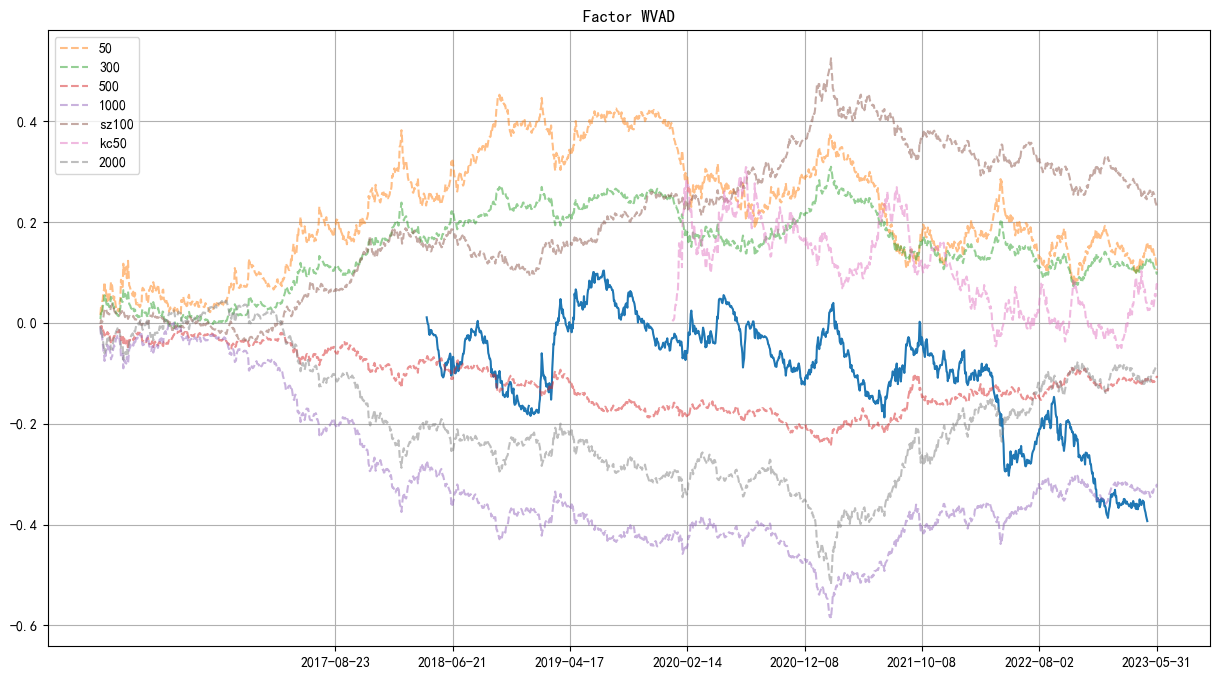

In [191]:
WVAD_select, WVAD_ret = xy.single_Factor_backtest(pd.concat(pre_lst,axis=1).dropna(how='all',axis=1).loc[['50','1000','300','500'],:], Index_rets, 1, 0.0005, 'WVAD')

## equal-weighted

In [1587]:
count = 0
# long_x = pd.DataFrame(1,['50','1000'],pd.read_csv('factors/NewFactor/'+f_names[-1],index_col=0).columns)
x = pd.DataFrame(0,['50','1000'],pd.read_csv('factors/NewFactor/'+f_names[-1],index_col=0).columns)
# short_x = pd.DataFrame(1,['50','1000'],pd.read_csv('factors/NewFactor/'+f_names[-1],index_col=0).columns)
for _f in list(f_dct.values())[:]:
    x += _f.loc[['50','1000']].rank()
    # long_x *= _f[_f==_f.max()]/_f[_f==_f.max()]
    # short_x *= _f[_f==_f.min()]/_f[_f==_f.min()]
    
    

    # if count > 0:
    #     _iflong50 *= _f.loc['50',] > _f.loc['1000',]
    # else:
    #     _iflong50 = _f.loc['50',] > _f.loc['1000',]
    # if count == 4:
    #     break
    # display(x.dropna(how='all',axis=1).dropna(how='all',axis=0))

<Axes: >

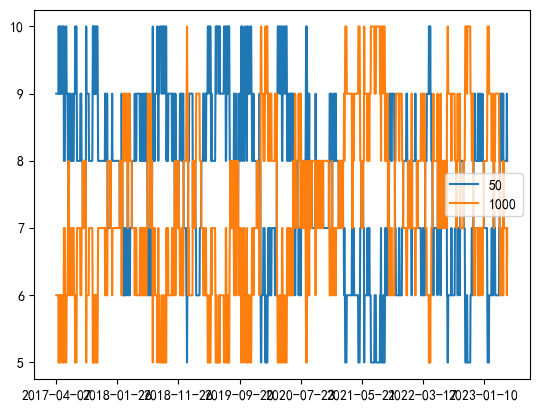

In [1590]:
x.dropna(how='all',axis=1).T.plot()

In [ ]:
short_x.dropna(how='all',axis=1)

2017-04-19  2017-04-24  2017-04-26  2017-05-05  2017-05-08  2017-05-09  \
50           NaN         NaN         NaN         NaN         NaN         NaN   
1000         1.0         1.0         1.0         1.0         1.0         1.0   

      2017-05-10  2017-05-12  2017-05-22  2017-05-23  ...  2022-11-01  \
50           NaN         NaN         NaN         NaN  ...         1.0   
1000         1.0         1.0         1.0         1.0  ...         NaN   

      2022-11-02  2022-11-03  2022-11-04  2022-11-07  2023-02-02  2023-02-03  \
50           1.0         1.0         1.0         1.0         1.0         1.0   
1000         NaN         NaN         NaN         NaN         NaN         NaN   

      2023-02-06  2023-02-07  2023-02-08  
50           1.0         1.0         1.0  
1000         NaN         NaN         NaN  

[2 rows x 191 columns]

In [ ]:
_iflong50.sum()

1327

<Axes: >

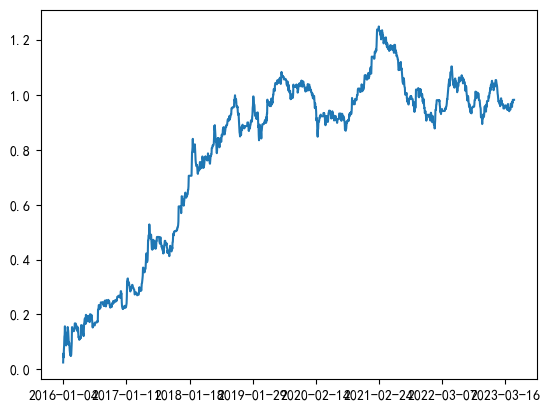

In [ ]:
((xy.Index_rets.loc['50'] * _iflong50) - (xy.Index_rets.loc['1000'] * _iflong50)).cumsum().plot()

<Axes: >

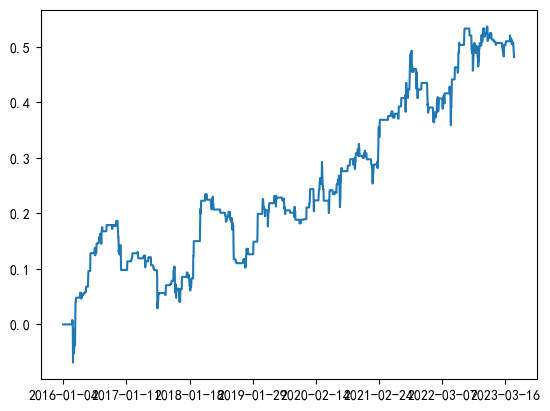

In [ ]:
((xy.Index_rets.loc['1000'] * -_iflong50) - (xy.Index_rets.loc['50'] * -_iflong50)).cumsum().plot()

In [ ]:
xy.Index_rets.loc['50']

2016-01-04   -0.062103
2016-01-05    0.007775
2016-01-06    0.012907
2016-01-07   -0.059137
2016-01-08    0.017896
                ...   
2023-05-26   -0.001907
2023-05-29   -0.004426
2023-05-30   -0.005157
2023-05-31   -0.016486
2023-06-01    0.002803
Name: 50, Length: 1802, dtype: float64

In [ ]:
_f.loc['50',] > _f.loc['1000',]

2016-01-04     True
2016-01-05     True
2016-01-06     True
2016-01-07     True
2016-01-08     True
              ...  
2023-04-28    False
2023-05-04    False
2023-05-05    False
2023-05-08    False
2023-05-09    False
Length: 1785, dtype: bool

In [ ]:
pd.DataFrame(long_x.dropna(how='all',axis=1).mask(pd.isna(long_x.dropna(how='all',axis=1)),-1),columns=xy.Index_rets.loc[['50','500'],'2017-04-07':].columns)

2017-04-07  2017-04-10  2017-04-11  2017-04-12  2017-04-13  2017-04-14  \
50           NaN         NaN         NaN         NaN         NaN         NaN   
1000         NaN         NaN         NaN         NaN         NaN         NaN   

      2017-04-17  2017-04-18  2017-04-19  2017-04-20  ...  2023-05-19  \
50           NaN         NaN         NaN         NaN  ...         NaN   
1000         NaN         NaN         NaN         NaN  ...         NaN   

      2023-05-22  2023-05-23  2023-05-24  2023-05-25  2023-05-26  2023-05-29  \
50           NaN         NaN         NaN         NaN         NaN         NaN   
1000         NaN         NaN         NaN         NaN         NaN         NaN   

      2023-05-30  2023-05-31  2023-06-01  
50           NaN         NaN         NaN  
1000         NaN         NaN         NaN  

[2 rows x 1497 columns]

In [1427]:
x_select

2017-04-07  2017-04-10  2017-04-11  2017-04-12  2017-04-13  2017-04-14  \
50           1.0         1.0         1.0         1.0         1.0         1.0   
1000        -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   

      2017-04-17  2017-04-18  2017-04-19  2017-04-20  ...  2023-03-14  \
50           1.0         1.0         1.0         1.0  ...        -1.0   
1000        -1.0        -1.0        -1.0        -1.0  ...         1.0   

      2023-03-15  2023-03-16  2023-03-17  2023-03-20  2023-03-21  2023-03-22  \
50          -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   
1000         1.0         1.0         1.0         1.0         1.0         1.0   

      2023-03-23  2023-03-24  2023-04-03  
50          -1.0        -1.0         1.0  
1000         1.0         1.0        -1.0  

[2 rows x 674 columns]

<Axes: >

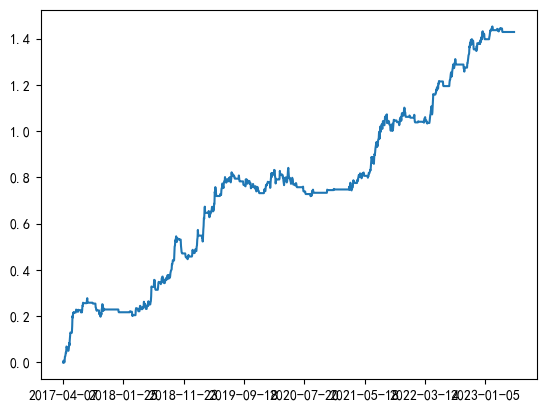

In [1586]:
x_ret.cumsum().ffill().plot()

In [1172]:
x.loc[['50','1000'],'2017-04-07':].loc[:,x[x.diff().abs()>4].dropna(how='all',axis=1).columns]

2017-04-07  2017-04-10  2017-04-11  2017-04-12  2017-04-13  2017-04-14  \
50      2.187279    2.102891    2.238802    2.220716    2.431352    2.132912   
1000   -2.883235   -2.521080   -2.663091   -2.686420   -2.401480   -2.513444   

      2017-04-17  2017-04-18  2017-04-19  2017-04-20  ...  2023-03-14  \
50      2.505889    3.165246    3.100874    3.174322  ...   -6.604026   
1000   -2.398301   -2.505325   -2.705344   -2.575621  ...    0.860797   

      2023-03-15  2023-03-16  2023-03-17  2023-03-20  2023-03-21  2023-03-22  \
50     -6.303153   -5.353795   -4.258287   -4.307215   -4.282493   -4.425073   
1000    0.073478   -0.299244    0.020743    0.863303    0.889584    1.536897   

      2023-03-23  2023-03-24  2023-04-03  
50     -4.298989   -3.615189    1.543198  
1000    1.694034    1.351848   -2.948592  

[2 rows x 674 columns]

In [1519]:
pd.DataFrame(x_select,columns=x.loc[['50','1000'],'2017-04-07':].columns).T.sort_index().T

2017-04-07  2017-04-10  2017-04-11  2017-04-12  2017-04-13  2017-04-14  \
50           1.0         1.0         1.0         1.0         1.0         1.0   
1000        -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   

      2017-04-17  2017-04-18  2017-04-19  2017-04-20  ...  2023-04-21  \
50           1.0         1.0         1.0         1.0  ...         1.0   
1000        -1.0        -1.0        -1.0        -1.0  ...        -1.0   

      2023-04-24  2023-04-25  2023-04-26  2023-04-27  2023-04-28  2023-05-04  \
50           1.0         1.0         1.0         1.0         1.0         1.0   
1000        -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   

      2023-05-05  2023-05-08  2023-05-09  
50           1.0         1.0         1.0  
1000        -1.0        -1.0        -1.0  

[2 rows x 1480 columns]

In [1599]:
cmx = x.loc[['50','1000'],'2017-04-07':].loc[:,x[(x.diff().abs()>=2)].dropna(how='all',axis=1).columns]

In [1601]:
cmx1 = pd.DataFrame(x_select,columns=x.loc[['50','1000'],'2017-04-07':].columns).T.sort_index().T

476.0
yoy: 0.25147271096932705 
 mdd: -0.17669818046541963 
 sharpe: 1.8342292346259426 
 rankIC: 0.16039051603905155 
 rankIR: 0.16238087036345003 
 win%: 0.27635135135135136 
 gain_loss%: -1.5889276028684103


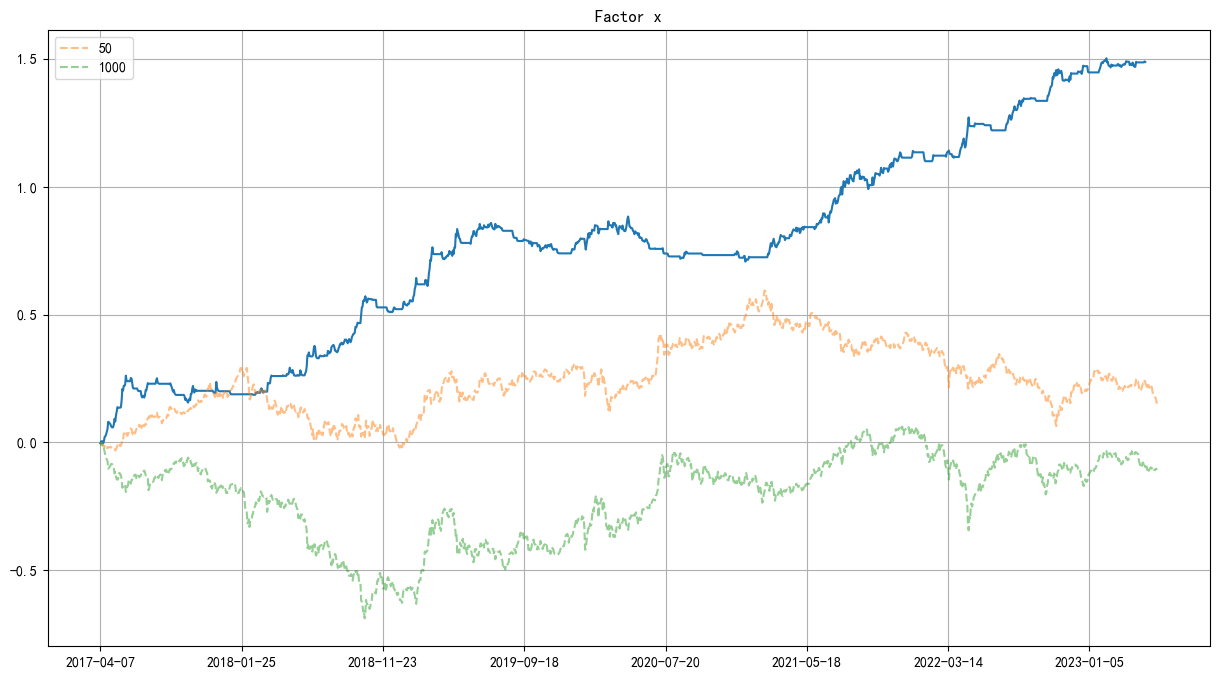

In [1613]:
x_select, x_ret = xy.single_Factor_backtest(cmx1, xy.Index_rets.loc[['50','1000'],'2017-04-07':], 1, 0.001, 'x')

In [1603]:
x_ret.dropna()[x_ret.dropna()!=0]

2017-04-07   -0.003013
2017-04-10    0.007371
2017-04-11   -0.006485
2017-04-12    0.006863
2017-04-13   -0.007591
                ...   
2023-04-13   -0.002000
2023-04-17    0.019187
2023-04-18   -0.002000
2023-05-08    0.003749
2023-05-09   -0.002000
Length: 836, dtype: float64

<Axes: >

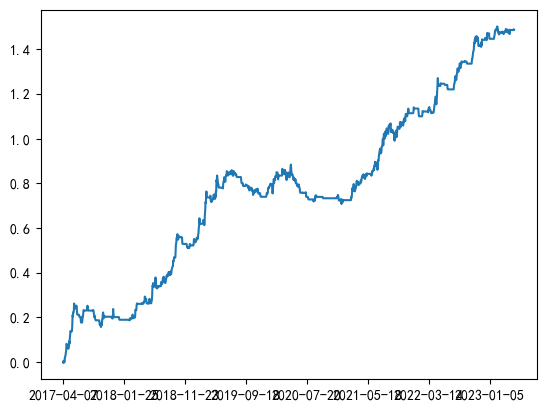

In [1607]:
x_ret.dropna().cumsum().plot()

202.0
yoy: 0.22604277131441997 
 mdd: -0.24319463716704415 
 sharpe: 1.1459805838462471 
 rankIC: 0.03046716316858497 
 rankIR: 0.03047099315835913 
 win%: 0.5111712931618145 
 gain_loss%: -1.154374608298304


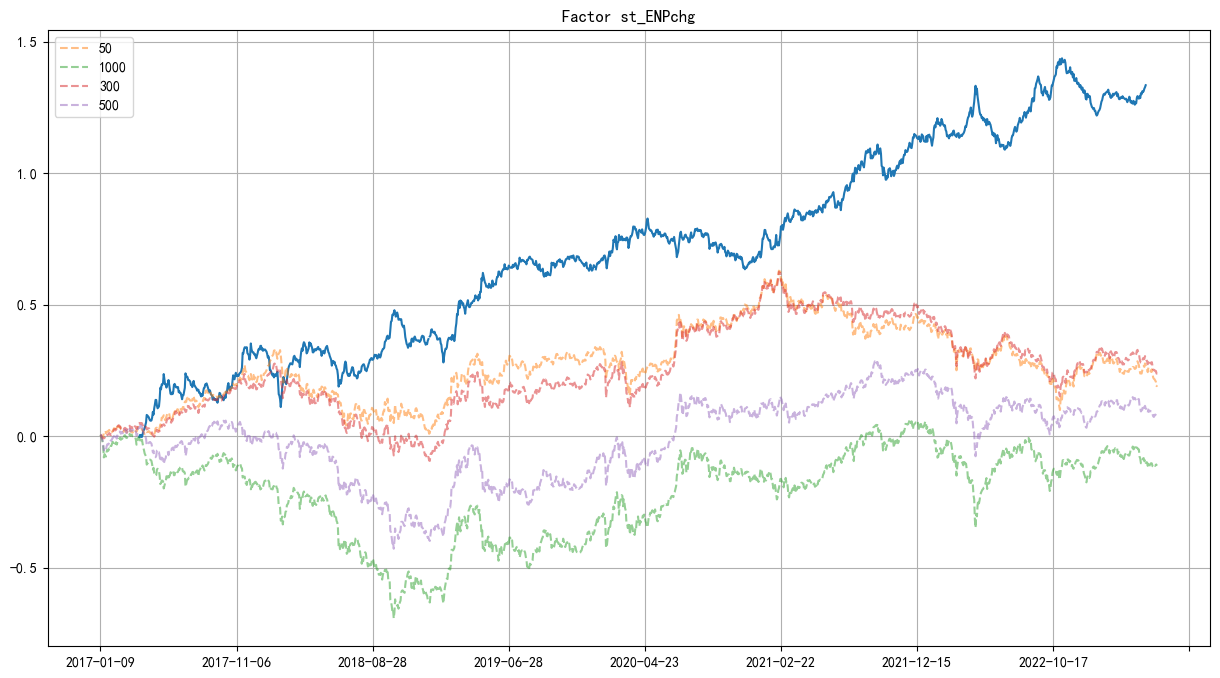

In [1585]:
st_ENPchg_select, st_ENPchg_ret = xy.single_Factor_backtest(f_dct['st_ENPchg'].dropna(how='all',axis=1).loc[['50','1000'],'2017-01-07':], Index_rets.loc[['50','1000','300','500'],'2017-01-07':], 1, 0.001, 'st_ENPchg')

0.08080413099080534
1 1.0
2 1.0


<Axes: >

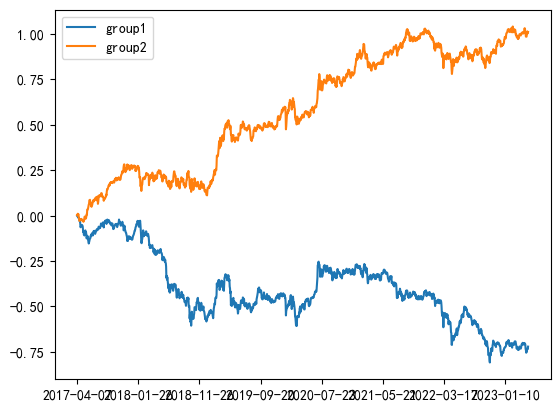

In [398]:
st_index_VROC_mean_gr = xy.cal_rate_group(x.dropna(how='all',axis=1).loc[['50','500'],:], Index_rets, group_num=2, masks=1)
st_index_VROC_mean_gr.dropna().cumsum().plot()

0.030470993158359133
1 1.0
2 1.0


<Axes: >

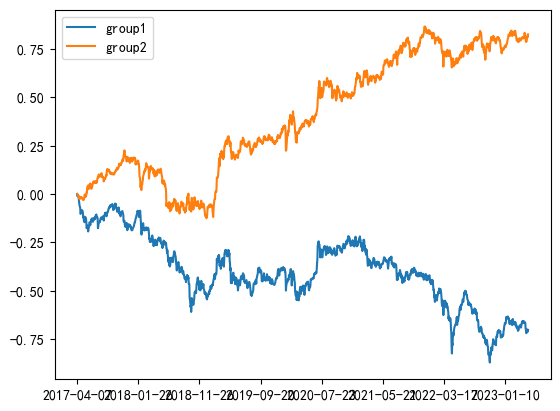

In [42]:
st_index_VROC_mean_gr = xy.cal_rate_group(f_dct['st_ENPchg'].dropna(how='all',axis=1).loc[['50','1000'],:], Index_rets, group_num=2, masks=1)
st_index_VROC_mean_gr.dropna().cumsum().plot()

In [38]:
WVAD_select, WVAD_ret = xy.single_Factor_backtest(pd.concat(pre_lst,axis=1).loc[['50','300','500','1000']], Index_rets, 1, 0.00, 'WVAD')

NameError: name 'pre_lst' is not defined

## Test by futrue tick

In [467]:
tb50 = pd.read_excel('代码表50.xlsx',index_col=0)

In [6]:
futrue_DF = []
for k,v in tqdm(tb50['dydm'].to_dict().items()):
    _df = pd.read_csv(r'\\share\FREE\lsh\his_data\future\tick\50\\' + str(k) + v +'.csv' ,engine='pyarrow')[['Code','Datetime','Time','BP1','SP1']]
    futrue_DF.append(_df)
futrue_DF = pd.concat(futrue_DF)
Close50_5min = futrue_DF[(futrue_DF.Time > 145500000)&(futrue_DF.Time < 150000000)]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1970/1970 [03:02<00:00, 10.78it/s]


In [445]:
Close50_5min['date'] = Close50_5min.Datetime.dt.date.map(lambda x:str(x))

In [446]:
def mean_drop0(x):
    return x[x>0].mean()

In [447]:
buy_price50 = Close50_5min.groupby('date')['SP1'].apply(mean_drop0)
sell_price50 = Close50_5min.groupby('date')['BP1'].apply(mean_drop0)

In [449]:
legal_dt50 = x_select.columns & buy_price50.index

In [450]:
table50 = pd.concat([
    x_select.loc['50',:].rename('sig50'),
    buy_price50.loc[legal_dt50].rename('BP50'),
    sell_price50.loc[legal_dt50].rename('SP50')
],axis=1)

In [470]:
tb500 = pd.read_excel('代码表500.xlsx',index_col=0)

In [10]:
futrue_DF = []
for k,v in tqdm(tb500['dydm'].to_dict().items()):
    _df = pd.read_csv(r'\\share\FREE\lsh\his_data\future\tick\500\\' + str(k) + v +'.csv',engine='pyarrow' )[['Code','Datetime','Time','BP1','SP1']]
    futrue_DF.append(_df)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1970/1970 [03:01<00:00, 10.86it/s]


In [11]:
futrue_DF = pd.concat(futrue_DF)
Close500_5min = futrue_DF[(futrue_DF.Time > 145500000)&(futrue_DF.Time < 150000000)]

In [451]:
Close500_5min['date'] = Close500_5min.Datetime.dt.date.map(lambda x:str(x))

In [452]:
buy_price500 = Close500_5min.groupby('date')['SP1'].apply(mean_drop0)
sell_price500 = Close500_5min.groupby('date')['BP1'].apply(mean_drop0)

In [453]:
legal_dt500 = x_select.columns & buy_price500.index

In [454]:
table500 = pd.concat([
    x_select.loc['500',:].rename('sig500'),
    buy_price500.loc[legal_dt500].rename('BP500'),
    sell_price500.loc[legal_dt500].rename('SP500')
],axis=1)

In [458]:
table_50_500 = pd.concat([
    table50,
    table500
],axis=1)

In [484]:
tb.index = tb.index.map(lambda x: str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:])

In [795]:
table_50_500['hold_shift'] = 0
table_50_500.loc[table_50_500.sig50[table_50_500.sig50==table_50_500.sig50.shift()].index,'hold_shift'] = 1
table_50_500.loc[tb.loc['20170407':].dueday[tb.loc['20170407':].dueday!=tb.loc['20170407':].dueday.shift()].index,'hold_shift'] = 0

log_dct = {}
for d, row in table_50_500.iterrows():
    log_dct[d] = {}
    if (row.sig50 == 1) & (row.hold_shift == 0):
        longratio = row.SP500 / (row.BP50* 1.5) 
        log_dct[d]['ratio'] =  longratio 
        
        # 建
        log_dct[d]['open_long_price'] = row.BP50+0.2
        log_dct[d]['long_position'] = (row.BP50+0.2) * longratio * 1.5 # （longratio*1.5）是50的数量
        log_dct[d]['open_short_price'] = row.SP500-0.4
        log_dct[d]['short_position'] = (row.SP500-0.4)  # 1单位500
        
        # 平
        log_dct[d]['close_long_price'] = row.SP50-0.2
        log_dct[d]['close_short_price'] = row.BP500+0.4
        
        log_dct[d]['extend_cost'] = row.BP500 - row.SP500 + 0.8 + row.BP50 - row.SP50 + 0.4
        log_dct[d]['hold_shift'] = 1
        log_dct[d]['iflong50'] = 1
        
        
        
        
    elif (row.sig50 == 1) & (row.hold_shift == 1):
        log_dct[d]['ratio'] =  longratio 
        log_dct[d]['long_price'] = row.SP50-0.2
        log_dct[d]['long_position'] = (row.SP50-0.2) * longratio* 1.5
        log_dct[d]['short_price'] = row.BP500+0.4
        log_dct[d]['short_position'] = row.BP500+0.4 # 1单位500
        log_dct[d]['hold_shift'] = 0
        log_dct[d]['iflong50'] = 1
        
    elif (row.sig50 == -1) & (row.hold_shift == 0):
        longratio = row.BP500 / (row.SP50* 1.5) 
        log_dct[d]['ratio'] =  longratio 
        
        # 建
        log_dct[d]['open_long_price'] = row.BP500+0.4
        log_dct[d]['long_position'] = row.BP500+0.4
        log_dct[d]['open_short_price'] = (row.SP50-0.2)
        log_dct[d]['short_position'] = (row.SP50-0.2) * longratio * 1.5
        
        # 平
        log_dct[d]['close_long_price'] = row.SP500-0.4
        log_dct[d]['close_short_price'] = row.BP50+0.2
        
        log_dct[d]['extend_cost'] = row.BP500 - row.SP500 + 0.8 + row.BP50 - row.SP50 + 0.4
        log_dct[d]['hold_shift'] = 1
        log_dct[d]['iflong50'] = 0
        
    elif (row.sig50 == -1) & (row.hold_shift == 1):
        log_dct[d]['ratio'] =  longratio
        log_dct[d]['open_long_price'] = row.SP500-0.4
        log_dct[d]['long_position'] = row.SP500-0.4
        log_dct[d]['open_short_price'] = (row.SP50+0.2)
        log_dct[d]['short_position'] = (row.SP50+0.2) * longratio * 1.5
        log_dct[d]['hold_shift'] = 0
        log_dct[d]['iflong50'] = 0

In [796]:
result = pd.DataFrame(log_dct).T
result['trd_flag'] = result.hold_shift.cumsum()

In [797]:
result.loc['2020-02-03','long_price'] = result.loc['2020-01-23','long_price']*0.9
result.loc['2020-02-03','long_position'] = result.loc['2020-01-23','long_position']*0.9

In [798]:
result['num_chg50'] = result.ratio.pct_change()

In [799]:
result['ret'] = result.long_position.pct_change() - result.short_position.pct_change()

In [800]:
table_50_500

sig50         BP50         SP50  sig500        BP500        SP500  \
2017-04-07   -1.0  2382.781959  2382.423711     1.0  6553.865971  6553.000418   
2017-04-10   -1.0  2377.249714  2376.832000     1.0  6548.727197  6548.198745   
2017-04-11   -1.0  2375.319033  2374.845921     1.0  6606.538829  6605.337093   
2017-04-12   -1.0  2367.313889  2366.788889     1.0  6562.146568  6561.037106   
2017-04-13   -1.0  2368.246552  2367.848276     1.0  6607.395289  6606.729336   
...           ...          ...          ...     ...          ...          ...   
2023-04-28    1.0  2681.360622  2681.048359    -1.0  6255.252381  6254.762245   
2023-05-04    1.0  2694.224735  2693.931449    -1.0  6252.750173  6252.340484   
2023-05-05   -1.0  2687.952585  2687.698396     1.0  6196.444062  6195.993804   
2023-05-08   -1.0  2721.598949  2721.355517     1.0  6233.881508  6233.459964   
2023-05-09   -1.0  2708.656507  2708.332534     1.0  6179.663889  6179.207639   

            hold_shift  
2017-04-07           0  
2017-04-10           1  
2017-04-11           1  
2017-04-12           1  
2017-04-13           1  
...                ...  
2023-04-28           1  
2023-05-04           1  
2023-05-05           0  
2023-05-08           1  
2023-05-09           1  

[1480 rows x 7 columns]

In [801]:
result.loc[result[(result.iflong50.shift(1)==1) & (result.iflong50==0)].index,'ret'] = result.short_price / result.long_price.shift(1)  - result.long_price / result.short_price.shift(1)
result.loc[result[(result.iflong50.shift(1)==0) & (result.iflong50==1)].index,'ret'] = result.long_price / result.short_price.shift(1)  - result.short_price / result.long_price.shift(1)

result.loc[result[(result.hold_shift==1) & (result.iflong50==result.iflong50.shift(1))].index,'ret'] = -0.002

In [802]:
result

ratio  open_long_price  long_position  open_short_price  \
2017-04-07  1.833949      6554.265971    6554.265971       2382.223711   
2017-04-10  1.833949      6547.798745    6547.798745       2377.032000   
2017-04-11  1.833949      6604.937093    6604.937093       2375.045921   
2017-04-12  1.833949      6560.637106    6560.637106       2366.988889   
2017-04-13  1.833949      6606.329336    6606.329336       2368.048276   
...              ...              ...            ...               ...   
2023-04-28  1.575330              NaN    6334.829640               NaN   
2023-05-04  1.575330              NaN    6365.272308               NaN   
2023-05-05  1.536989      6196.844062    6196.844062       2687.498396   
2023-05-08  1.536989      6233.059964    6233.059964       2721.555517   
2023-05-09  1.536989      6178.807639    6178.807639       2708.532534   

            short_position  close_long_price  close_short_price  extend_cost  \
2017-04-07     6553.315786       6552.600418        2382.981959     2.423801   
2017-04-10     6539.033784               NaN                NaN          NaN   
2017-04-11     6533.570233               NaN                NaN          NaN   
2017-04-12     6511.405951               NaN                NaN          NaN   
2017-04-13     6514.320244               NaN                NaN          NaN   
...                    ...               ...                ...          ...   
2023-04-28     6255.652381               NaN                NaN          NaN   
2023-05-04     6253.150173               NaN                NaN          NaN   
2023-05-05     6195.982965       6195.593804        2688.152585     1.904447   
2023-05-08     6274.501093               NaN                NaN          NaN   
2023-05-09     6244.476823               NaN                NaN          NaN   

            hold_shift  iflong50   long_price  short_price  trd_flag  \
2017-04-07         1.0       0.0          NaN          NaN       1.0   
2017-04-10         0.0       0.0          NaN          NaN       1.0   
2017-04-11         0.0       0.0          NaN          NaN       1.0   
2017-04-12         0.0       0.0          NaN          NaN       1.0   
2017-04-13         0.0       0.0          NaN          NaN       1.0   
...                ...       ...          ...          ...       ...   
2023-04-28         0.0       1.0  2680.848359  6255.652381     264.0   
2023-05-04         0.0       1.0  2693.731449  6253.150173     264.0   
2023-05-05         1.0       0.0          NaN          NaN     265.0   
2023-05-08         0.0       0.0          NaN          NaN     265.0   
2023-05-09         0.0       0.0          NaN          NaN     265.0   

            num_chg50       ret  
2017-04-07        NaN       NaN  
2017-04-10   0.000000  0.001193  
2017-04-11   0.000000  0.009562  
2017-04-12   0.000000 -0.003315  
2017-04-13   0.000000  0.006517  
...               ...       ...  
2023-04-28   0.000000 -0.004630  
2023-05-04   0.000000  0.005206  
2023-05-05  -0.024338       NaN  
2023-05-08   0.000000 -0.006828  
2023-05-09   0.000000 -0.003919  

[1480 rows x 15 columns]

<Axes: >

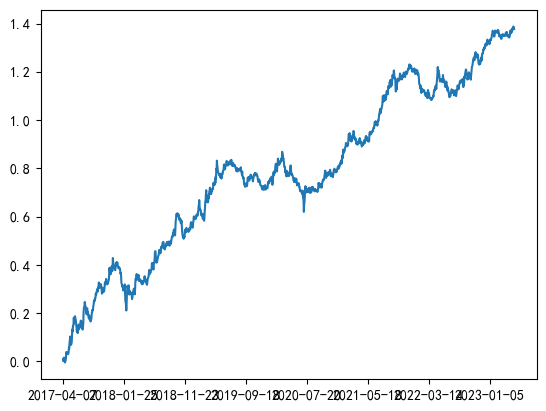

In [793]:
result.ret.cumsum().plot()

In [ ]:
result.loc['2020-07-06'

In [794]:
result.ret.sort_values()

2020-07-06   -0.045939
2021-09-27   -0.043071
2018-02-01   -0.038469
2018-01-31   -0.031853
2018-07-05   -0.030128
                ...   
2017-12-05    0.038019
2019-04-29    0.039535
2018-02-08    0.041762
2017-07-17    0.046795
2017-04-07         NaN
Name: ret, Length: 1480, dtype: float64

In [790]:
result.loc['2021-08-20':]

ratio   long_price  long_position  short_price  short_position  \
2021-08-20  1.351616  6878.193583    6878.193583  3060.189773     6204.303372   
2021-08-23  1.499127  6950.433389    6950.433389  3090.503237     6949.583651   
2021-08-24  1.499127  7018.844444    7018.844444  3140.339219     7061.649325   
2021-08-25  1.499127  7061.916388    7061.916388  3144.889965     7071.882542   
2021-08-26  1.499127  7059.119463    7059.119463  3082.734805     6932.114856   
...              ...          ...            ...          ...             ...   
2023-04-28  1.575330  2680.848359    6334.829640  6255.652381     6255.652381   
2023-05-04  1.575330  2693.731449    6365.272308  6253.150173     6253.150173   
2023-05-05  1.536989  6196.844062    6196.844062  2687.498396     6195.982965   
2023-05-08  1.536989  6233.059964    6233.059964  2721.555517     6274.501093   
2023-05-09  1.536989  6178.807639    6178.807639  2708.532534     6244.476823   

            extend_cost  hold_shift  iflong50  trd_flag  num_chg50       ret  
2021-08-20          NaN         0.0       0.0     188.0   0.000000  0.016000  
2021-08-23     1.996898         1.0       0.0     189.0   0.109136 -0.109620  
2021-08-24          NaN         0.0       0.0     189.0   0.000000 -0.006283  
2021-08-25          NaN         0.0       0.0     189.0   0.000000  0.004687  
2021-08-26          NaN         0.0       0.0     189.0   0.000000  0.019368  
...                 ...         ...       ...       ...        ...       ...  
2023-04-28          NaN         0.0       1.0     264.0   0.000000 -0.004630  
2023-05-04          NaN         0.0       1.0     264.0   0.000000  0.005206  
2023-05-05     1.904447         1.0       0.0     265.0  -0.024338  0.006691  
2023-05-08          NaN         0.0       0.0     265.0   0.000000 -0.006828  
2023-05-09          NaN         0.0       0.0     265.0   0.000000 -0.003919  

[413 rows x 11 columns]

In [756]:
result.ret.sort_values()

2020-02-04   -0.123526
2021-08-23   -0.109620
2022-10-24   -0.091898
2022-12-19   -0.080172
2019-03-18   -0.067818
                ...   
2018-02-08    0.041762
2017-07-17    0.046795
2018-11-19    0.086748
2020-02-03    0.096686
2017-04-07         NaN
Name: ret, Length: 1480, dtype: float64

In [753]:
result[result.trd_flag==5]

ratio   long_price  long_position  short_price  short_position  \
2017-06-27  1.595631  6066.421186    6066.421186  2534.230024     6065.542497   

            hold_shift  iflong50  trd_flag  num_chg50       ret  
2017-06-27         1.0       0.0       5.0   0.007596  0.008212

In [754]:
result[result.trd_flag==6]

ratio   long_price  long_position  short_price  short_position  \
2017-06-28  1.601089  2517.878815    6047.022855  6046.142529     6046.142529   

            hold_shift  iflong50  trd_flag  num_chg50       ret  
2017-06-28         1.0       1.0       6.0   0.003421 -0.003109

In [652]:
def cal_shift_ret(x):
    return x.ret.sum()

In [653]:
result_ret = result.groupby('trd_flag').apply(cal_shift_ret)

In [654]:
result[result.trd_flag==4]

ratio   long_price  long_position  short_price  short_position  \
2017-06-13  1.583602  2507.674184    5956.737742  5955.862661     5955.862661   
2017-06-14  1.583602  2476.912321    5883.665908  5956.004701     5956.004701   
2017-06-15  1.583602  2456.525632    5835.239298  6009.602204     6009.602204   
2017-06-16  1.583602  2456.614545    5835.450504  6015.882051     6015.882051   
2017-06-19  1.583602  2466.564733    5859.086213  6007.712139     6007.712139   
2017-06-20  1.583602  2455.428111    5832.632242  6026.620779     6026.620779   
2017-06-21  1.583602  2476.382407    5882.407150  6032.468302     6032.468302   
2017-06-22  1.583602  2492.121030    5919.792727  5945.795683     5945.795683   
2017-06-23  1.583602  2513.193805    5969.849069  5955.481913     5955.481913   
2017-06-26  1.583602  2521.960094    5990.672540  6086.789374     6086.789374   

            hold_shift  iflong50  trd_flag  num_chg50  adj_50_position  \
2017-06-13         1.0       1.0       4.0    0.01921      5842.306112   
2017-06-14         0.0       1.0       4.0    0.00000      5883.665908   
2017-06-15         0.0       1.0       4.0    0.00000      5835.239298   
2017-06-16         0.0       1.0       4.0    0.00000      5835.450504   
2017-06-19         0.0       1.0       4.0    0.00000      5859.086213   
2017-06-20         0.0       1.0       4.0    0.00000      5832.632242   
2017-06-21         0.0       1.0       4.0    0.00000      5882.407150   
2017-06-22         0.0       1.0       4.0    0.00000      5919.792727   
2017-06-23         0.0       1.0       4.0    0.00000      5969.849069   
2017-06-26         0.0       1.0       4.0    0.00000      5990.672540   

                 ret  
2017-06-13 -0.005926  
2017-06-14 -0.012291  
2017-06-15 -0.017230  
2017-06-16 -0.001009  
2017-06-19  0.005408  
2017-06-20 -0.007662  
2017-06-21  0.007564  
2017-06-22  0.020723  
2017-06-23  0.006827  
2017-06-26 -0.018560

In [655]:
result[result.trd_flag==5]

ratio   long_price  long_position  short_price  short_position  \
2017-06-27  1.595631  6066.421186    6066.421186  2534.230024     6065.542497   

            hold_shift  iflong50  trd_flag  num_chg50  adj_50_position  \
2017-06-27         1.0       0.0       5.0   0.007596      6019.471275   

                 ret  
2017-06-27  0.016013

In [656]:
result_ret.head(20)

trd_flag
1.0    -4.162300e-03
2.0     1.908383e-01
3.0    -1.985957e-01
4.0    -2.215612e-02
5.0     1.601345e-02
6.0     7.307112e-07
7.0    -7.882668e-03
8.0     3.306057e-02
9.0     5.394361e-03
10.0   -4.684925e-02
11.0    8.842398e-02
12.0   -3.675515e-02
13.0   -3.339651e-02
14.0   -1.758996e-07
15.0    7.088557e-04
16.0   -6.107201e-04
17.0   -2.046485e-02
18.0    3.485039e-02
19.0   -1.439698e-02
20.0    1.412979e-02
dtype: float64

In [561]:
result_ret.iloc[:].cumsum().unique().shape

(173,)

In [560]:
result_ret.iloc[:].cumsum().unique()

array([-0.0041623 ,  0.18232296,  0.18849292,  0.17226299,  0.16438111,
        0.18975639,  0.22077649,  0.20403032,  0.27603883,  0.30854675,
        0.30925571,  0.28879147,  0.30286127,  0.31698932,  0.32382934,
        0.36159745,  0.33489863,  0.36399581,  0.3603771 ,  0.27989625,
        0.27176569,  0.24864121,  0.26428425,  0.26161047,  0.26908467,
        0.27467748,  0.27894266,  0.3234828 ,  0.33073876,  0.31711296,
        0.3155082 ,  0.30513714,  0.31391963,  0.32218934,  0.30775316,
        0.37658945,  0.36014978,  0.41825762,  0.44070664,  0.43375567,
        0.43431269,  0.49070632,  0.50645155,  0.49744274,  0.52218179,
        0.49760142,  0.50183123,  0.41825465,  0.45664439,  0.48499462,
        0.46411511,  0.47916435,  0.49360547,  0.49487501,  0.49640347,
        0.56081257,  0.59156846,  0.62988605,  0.64812449,  0.69231245,
        0.69779562,  0.74229752,  0.73790819,  0.7390834 ,  0.74199253,
        0.70988945,  0.70654273,  0.70377337,  0.65766082,  0.64

In [562]:
result_ret.iloc[:].cumsum()

trd_flag
1.0     -0.004162
2.0      0.182323
3.0      0.188493
4.0      0.172263
5.0      0.172263
           ...   
261.0    1.314328
262.0    1.323451
263.0    1.323854
264.0    1.341406
265.0    1.330659
Length: 265, dtype: float64

In [511]:
result_ret.iloc[:].cumsum()

trd_flag
1.0     -0.004162
2.0      0.182323
3.0      0.188493
4.0      0.172263
5.0      0.172263
           ...   
261.0    1.314328
262.0    1.323451
263.0    1.323854
264.0    1.341406
265.0    1.330659
Length: 265, dtype: float64